In [1]:
pka_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\lrp_results\pka\SME(correct)_difference_between_non_f_and_f'
logp_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\lrp_results\logp\SME(correct)_difference_between_non_f_and_f'

---------

---------

---------

---------

---------

---------

LogP

In [2]:
from rdkit import Chem
import re

def convert_google_sheet_url(url):
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    new_url = re.sub(pattern, replacement, url)

    return new_url

import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/1CzpQGGeGzVZ0sv-pUm6jfaQ2dB6vecDpXeotMhIpUnQ/edit#gid=0'

new_url = convert_google_sheet_url(url)

print(new_url)

df = pd.read_csv(new_url)

df.dropna(subset=['F Group'], inplace=True)

smiles_to_id = {}
for index, row in df.iterrows():
    if not pd.isnull(row['Unnamed: 10']) or pd.isnull(row['F Group Weight.1']):
        continue
    smiles_to_id[row['Amide SMILES']] = row['Amide ID']

https://docs.google.com/spreadsheets/d/1CzpQGGeGzVZ0sv-pUm6jfaQ2dB6vecDpXeotMhIpUnQ/export?gid=0&format=csv


In [3]:
import re

pattern_fluorine_group = r"\{\d+,(\d+)\}"
pattern_scaffold_index = r"\{(\d+),\d+\}"
pattern_molecule_type = r"(\d+)\{"

number_of_molecules = 0

ids = set()

for smiles, id in smiles_to_id.items():
    fluorine_group = int(re.search(pattern_fluorine_group, id).group(1))
    scaffold_index = int(re.search(pattern_scaffold_index, id).group(1))
    molecule_type = int(re.search(pattern_molecule_type, id).group(1))

    if molecule_type not in [4, 5, 6]:
        continue

    transformed_id = id[:-2] + 'b}'
    
    ids.add(transformed_id)

id_to_smiles = {id: set() for id in ids}
id_to_fluorine_group = {id: set() for id in ids}

In [4]:
import os
import sys

logp_mol_images = os.listdir(logp_path)
logp_smiles = [filename.split('_')[1].split('.')[0] for filename in logp_mol_images]

In [5]:
import time

not_found = 0
for smiles in logp_smiles:
    
    if smiles not in smiles_to_id:
        not_found += 1
        continue
    
    id = smiles_to_id[smiles]
    fluorine_group = int(re.search(pattern_fluorine_group, id).group(1))
    transformed_id = id[:-2] + 'b}'
    
    id_to_fluorine_group[transformed_id].add(fluorine_group)
    id_to_smiles[transformed_id].add(smiles)
    

    # time.sleep(0.1)
    

print(not_found)

3


In [6]:
for id in id_to_fluorine_group.keys():
    print(id, id_to_fluorine_group[id], id_to_smiles[id])

α-5{10,b} {5} {'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1'}
cis-β-4{3,b} {4, 5} {'[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1', 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1'}
β-4{6,b} {6} {'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1'}
β-6{2,b} {6} {'CCC(F)(F)CC(=O)NC1=CC=CC=C1'}
cis-β,δ-5{6,b} {2} {'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1'}
β-4{4,b} {6} {'FC1(F)CCC1NC(=O)C1=CC=CC=C1'}
β-6{7,b} {6} {'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1'}
α-5{6,b} {3, 4} {'[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1', '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1'}
γ-4{7,b} {6} {'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1'}
β-5{5,b} {2, 3, 4, 5, 6} {'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1', 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1', 'FC1CCN(C1)C(=O)C1=CC=CC=C1', '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1', '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1'}
γ-5{6,b} {2, 3, 4, 5, 6} {'FC1CCN(CC1)C(=O)C1=CC=CC=C1', '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1', 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1', '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1', 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1'}
β-5{4,b} {2, 3, 4, 5, 

1
single image
2
1
single image
1
single image
1
single image
1
single image
1
single image
2
1
single image
5
5
5
0
1
single image
3
0
1
single image
4
3
1
single image
1
single image
1
single image
1
single image


C:\Users\38066\AppData\Local\Temp\ipykernel_10988\1053814817.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 3))


1
single image
1
single image
3
4
1
single image
2
3
1
single image
1
single image
1
single image
1
single image
1
single image
3
1
single image
5
1
single image
1
single image
2
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
3
1
single image
1
single image
1
single image
2
0
2
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
2
3
3
1
single image
2
1
single image
1
single image
1
single image
3
1
single image
1
single image


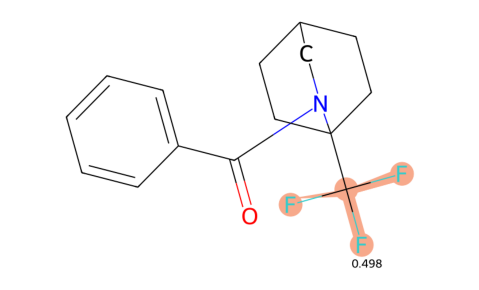

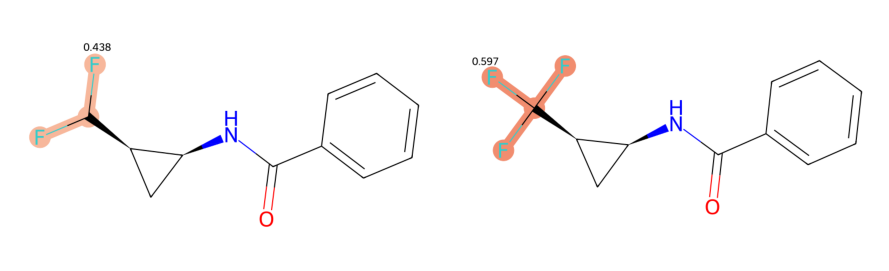

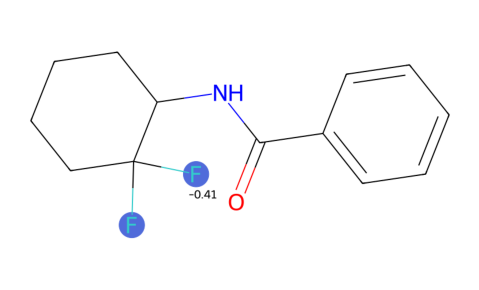

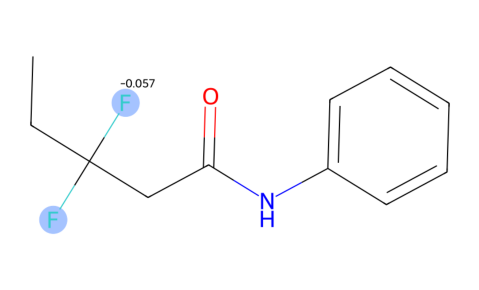

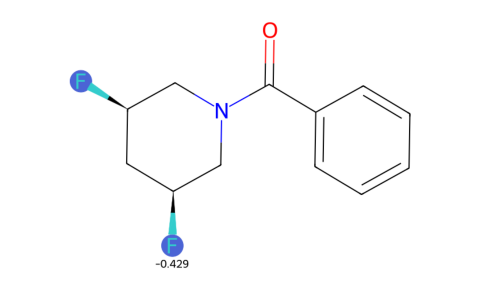

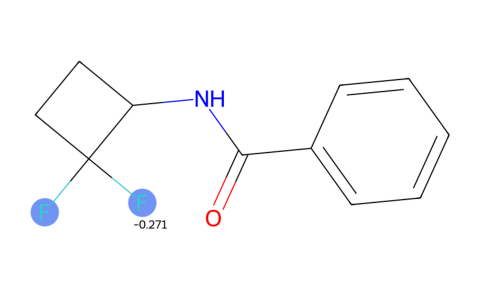

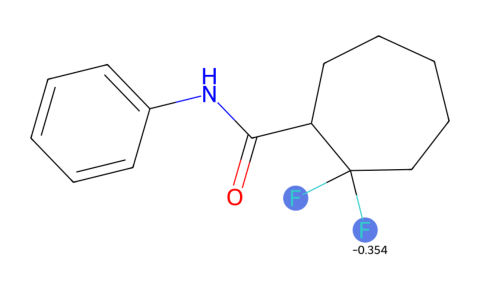

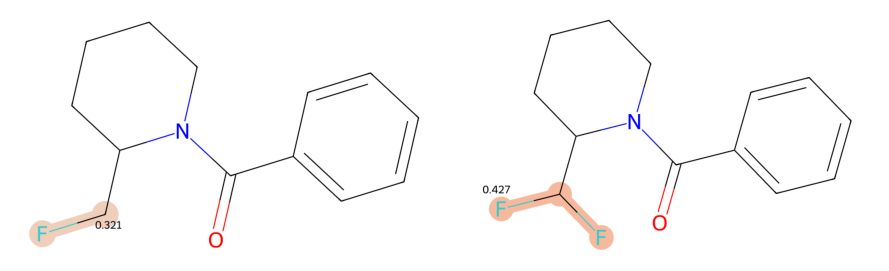

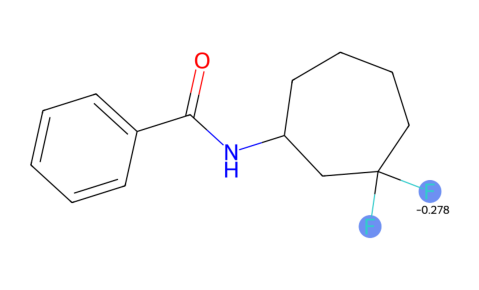

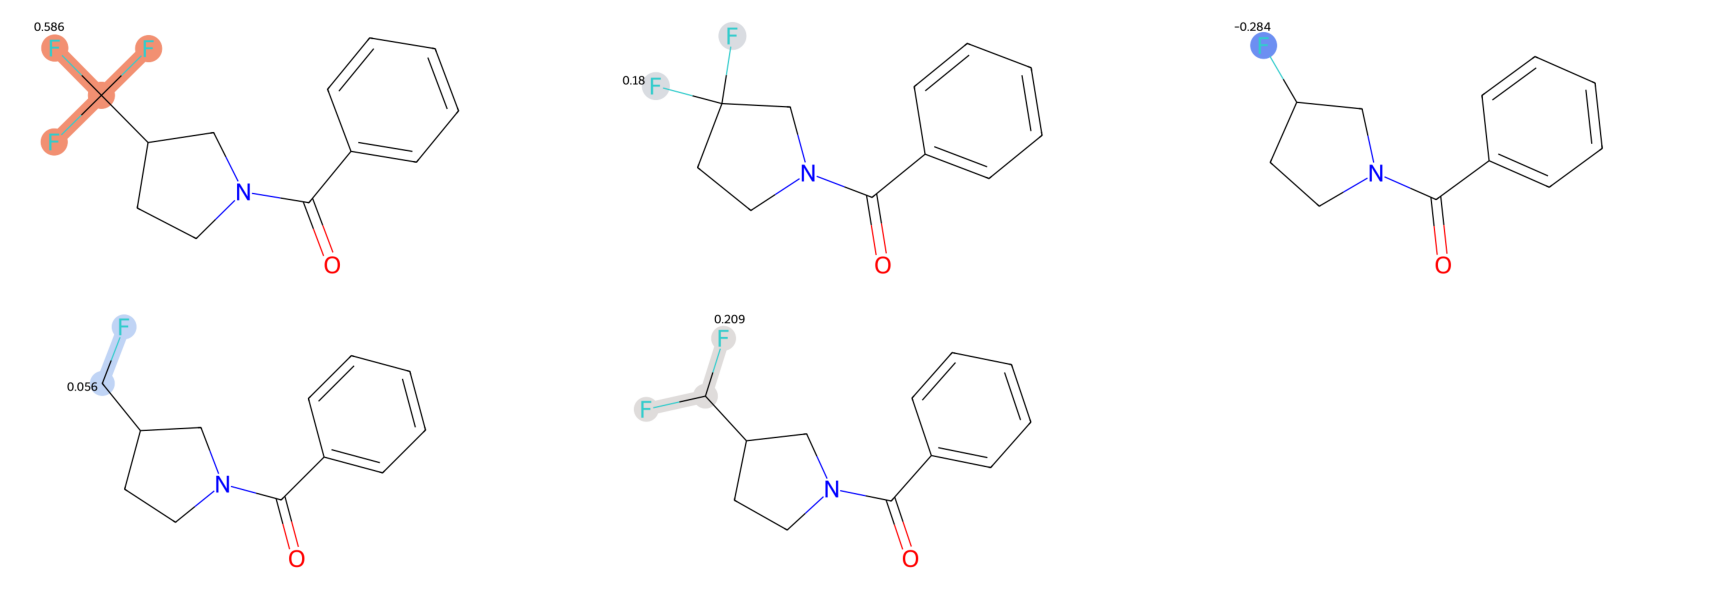

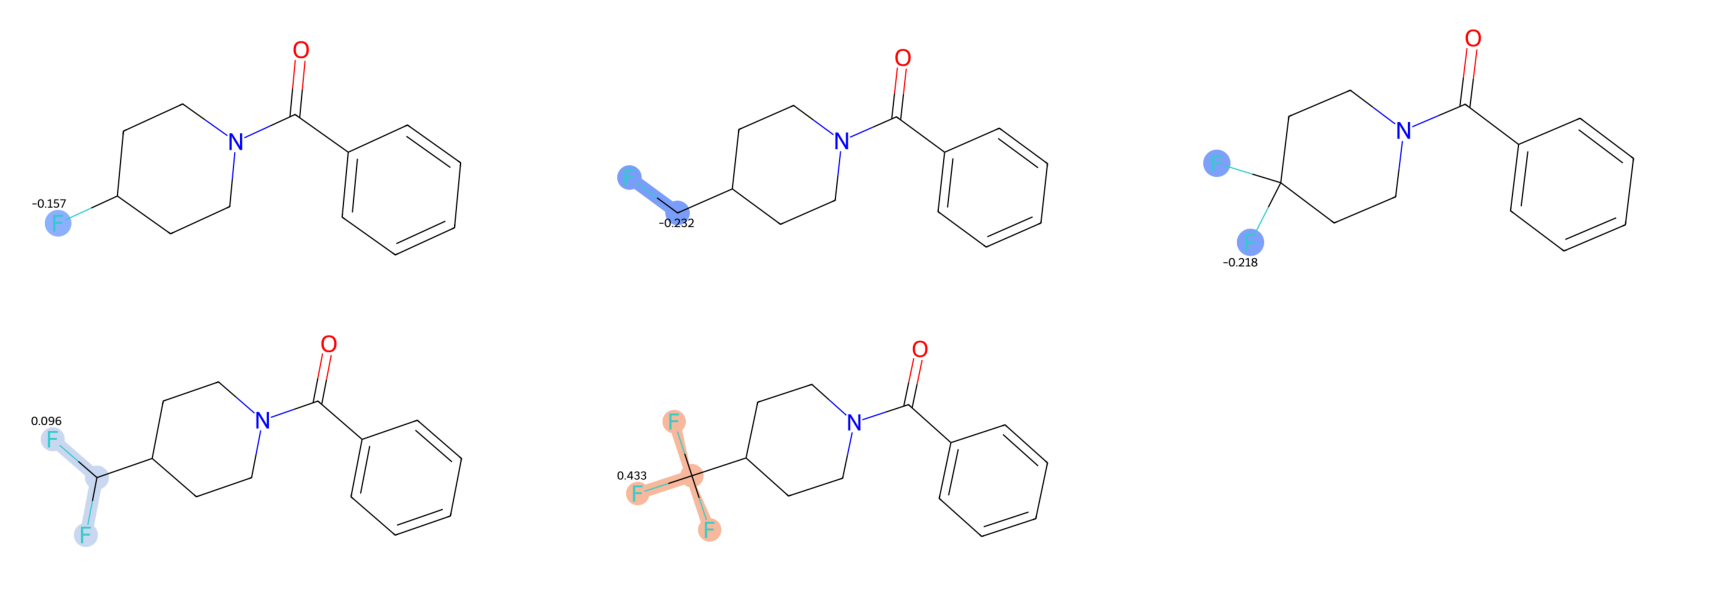

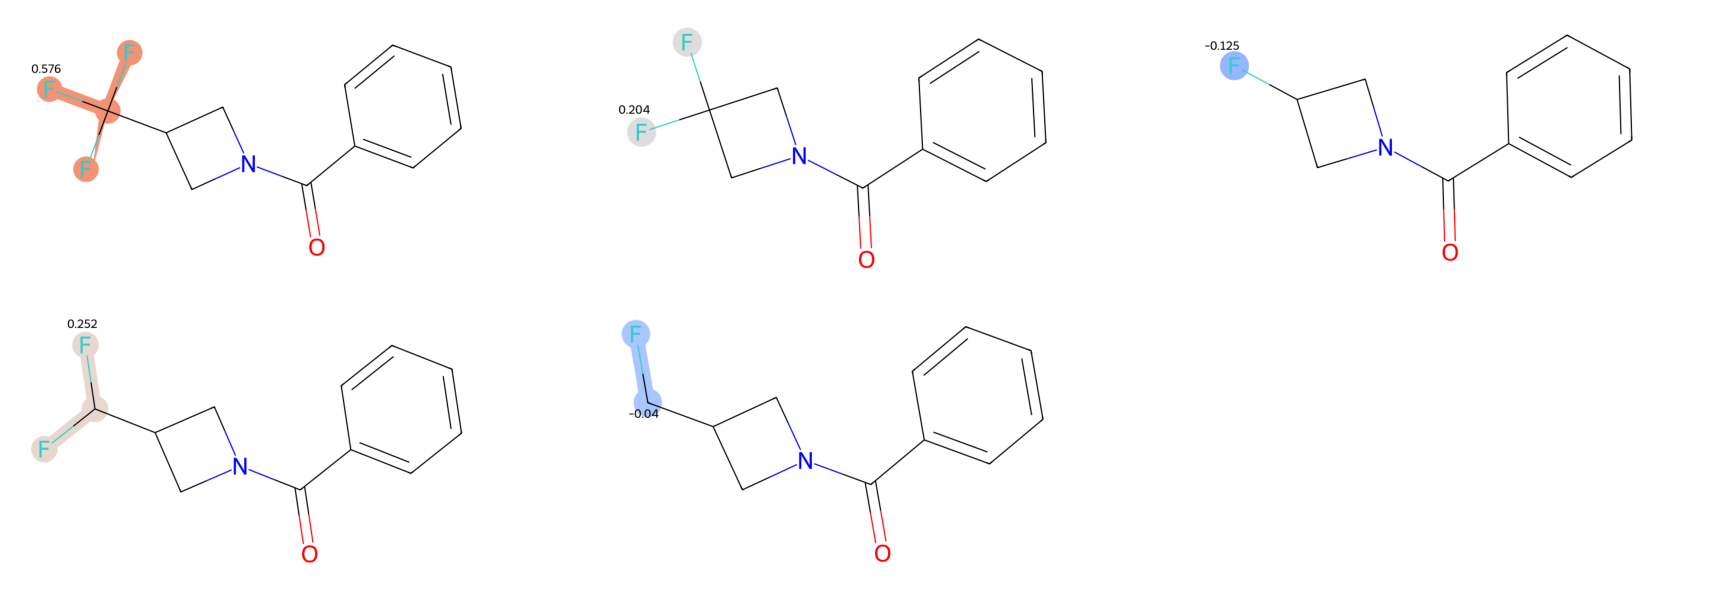

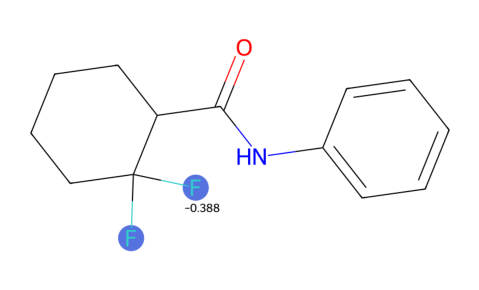

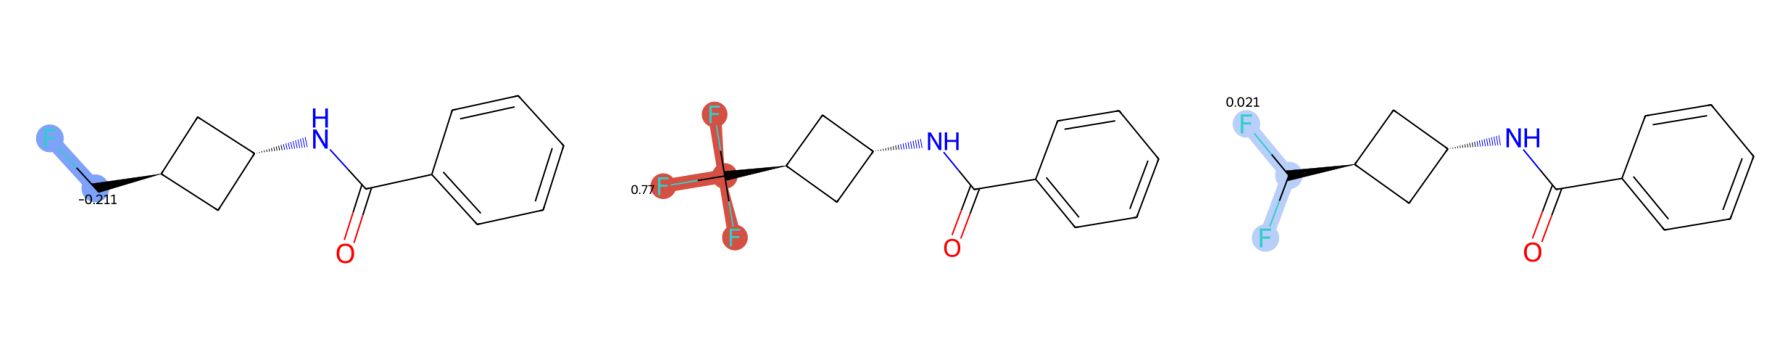

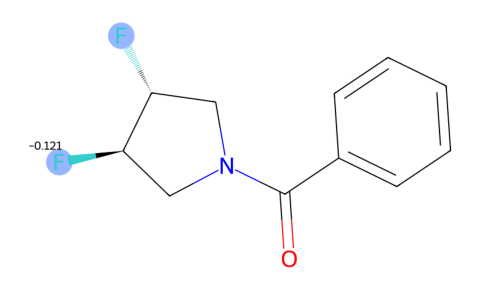

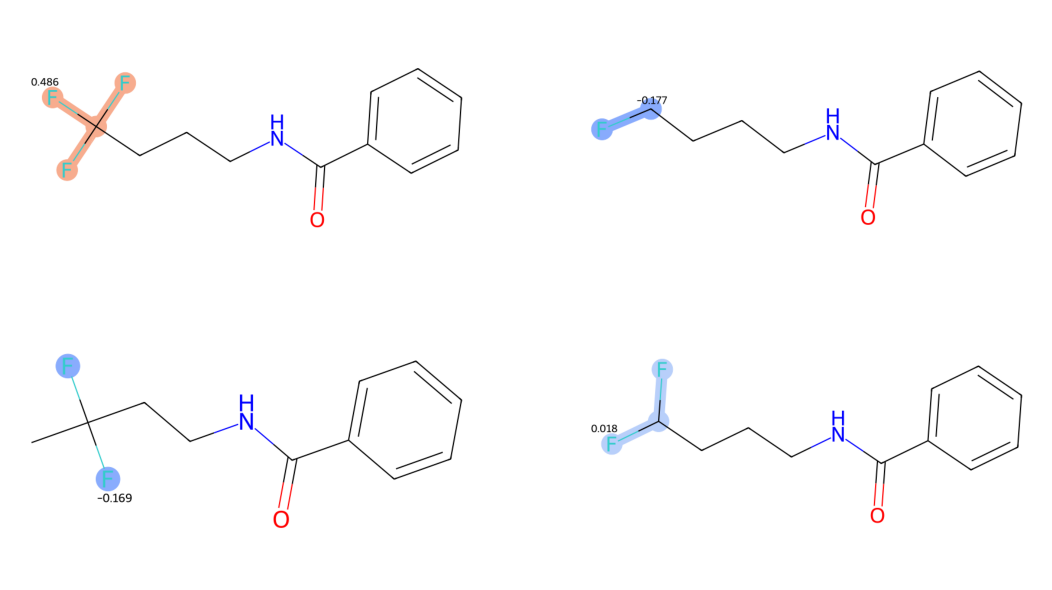

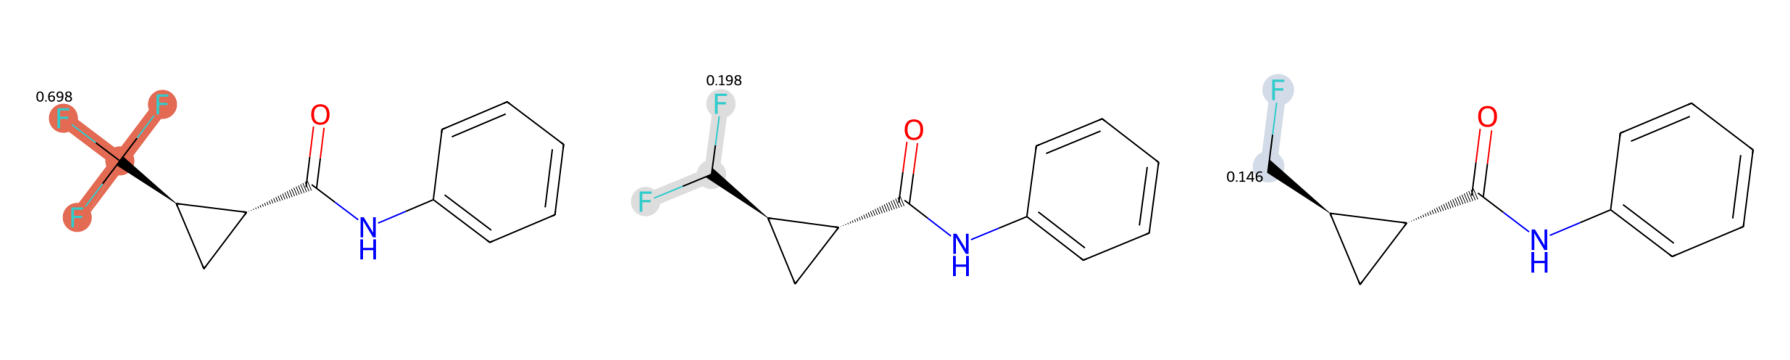

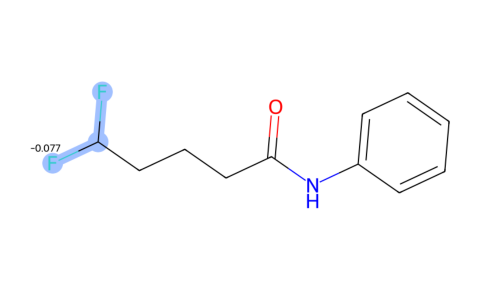

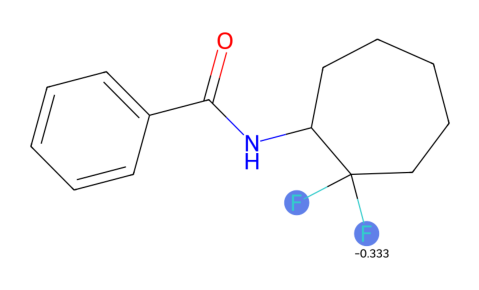

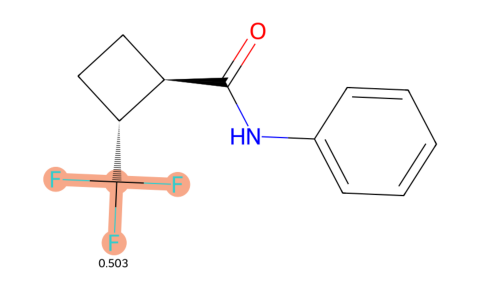

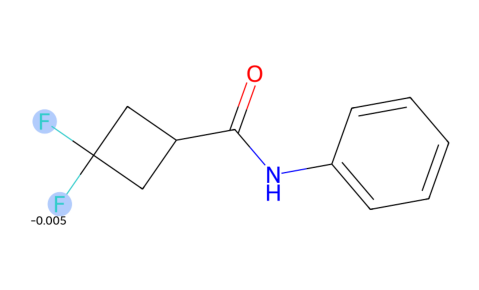

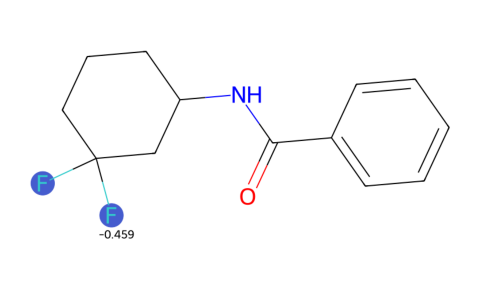

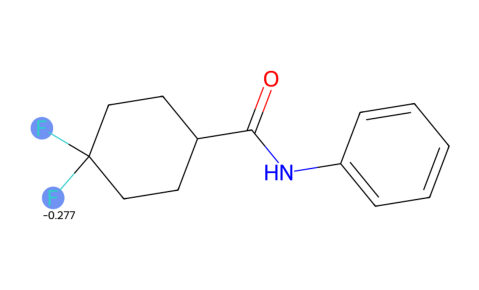

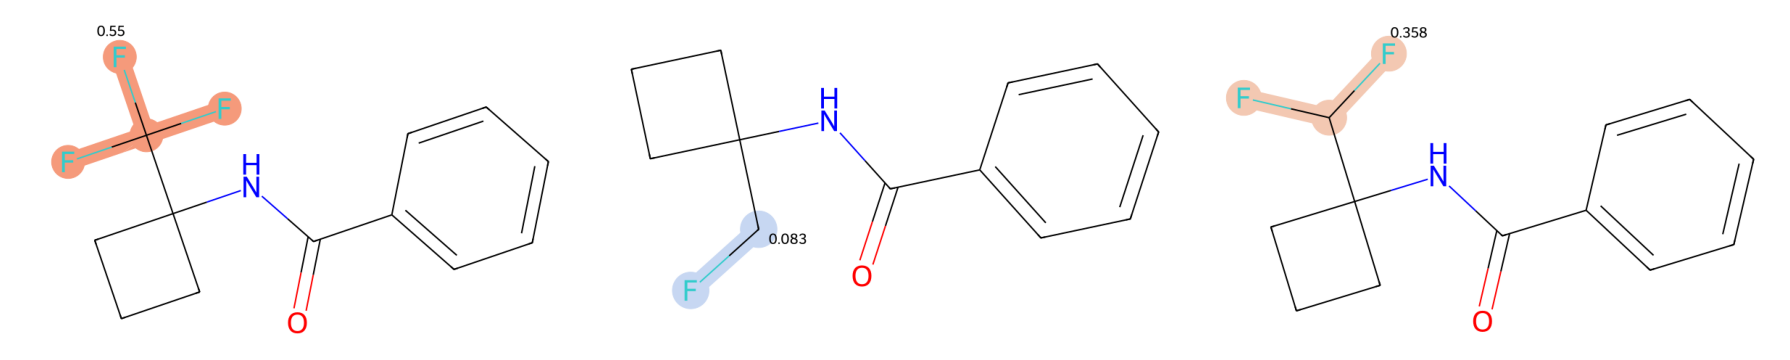

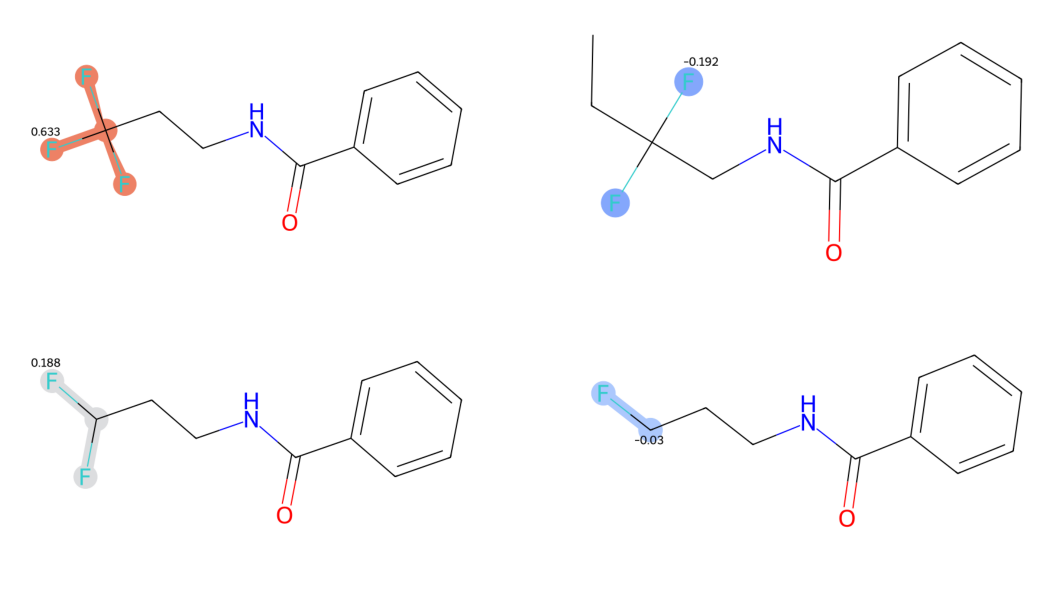

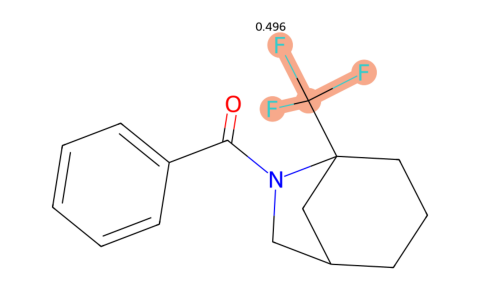

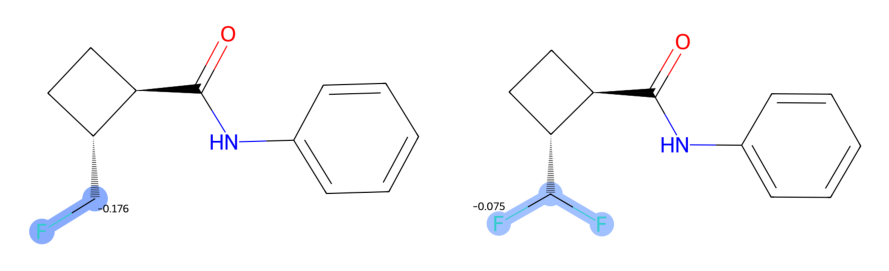

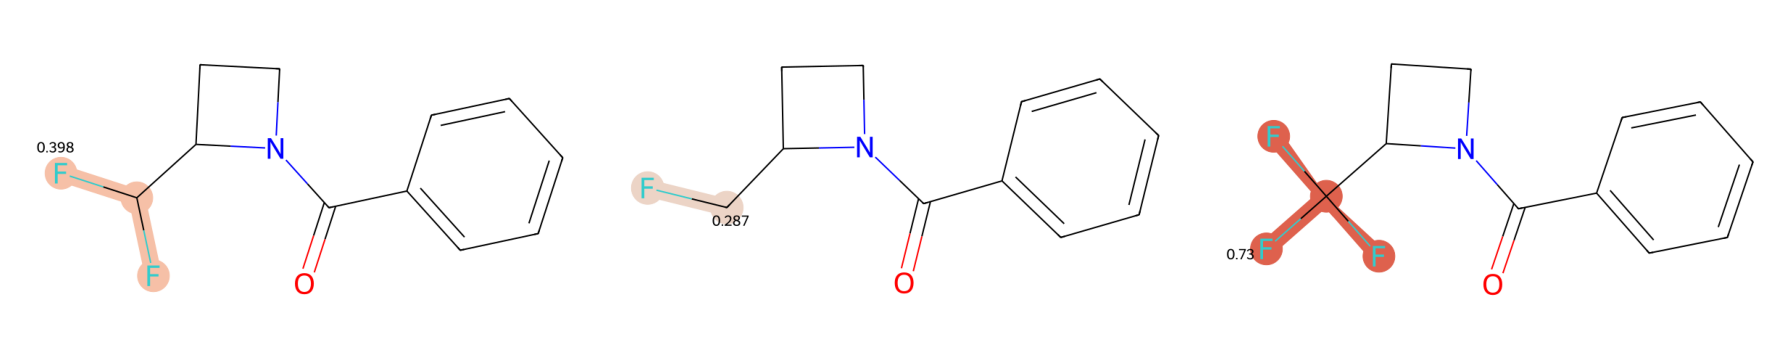

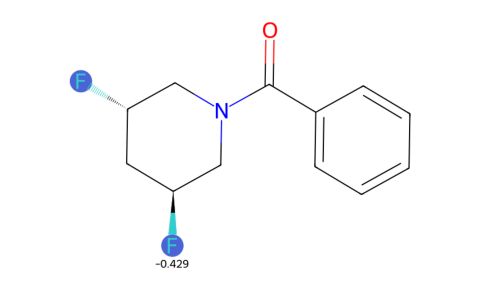

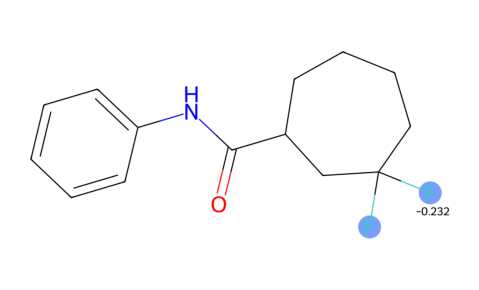

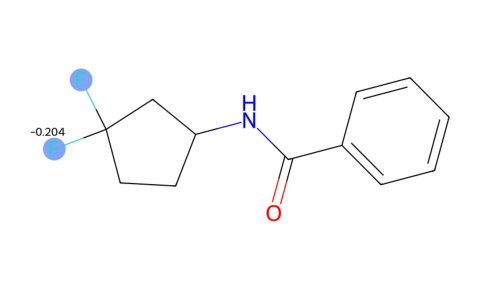

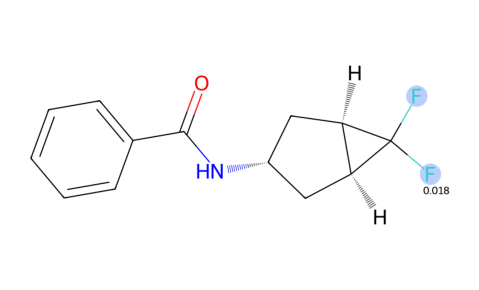

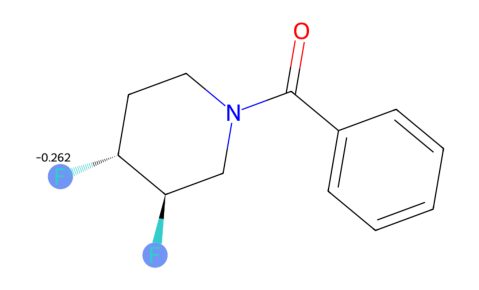

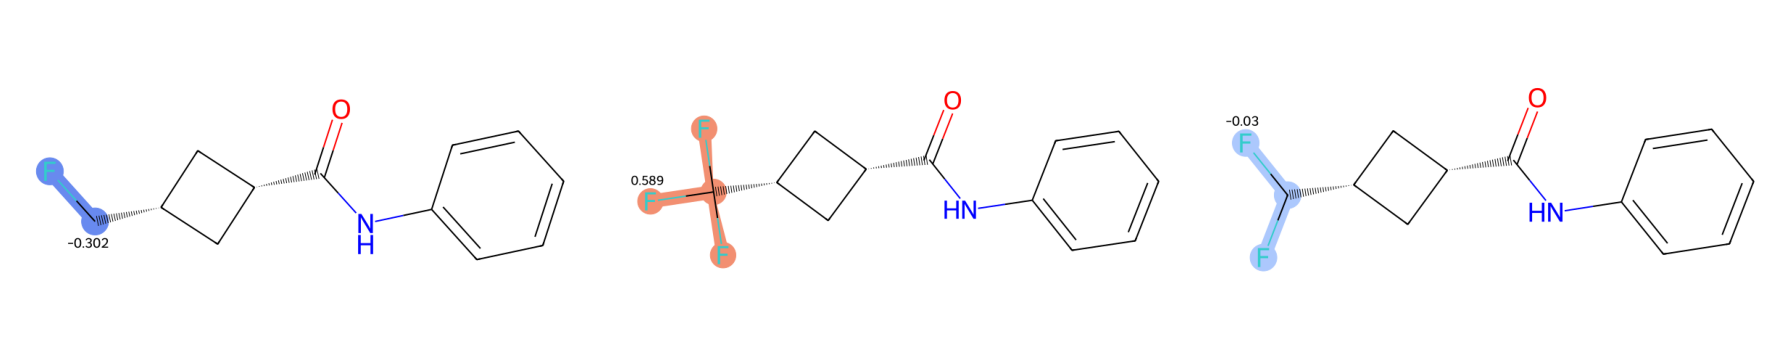

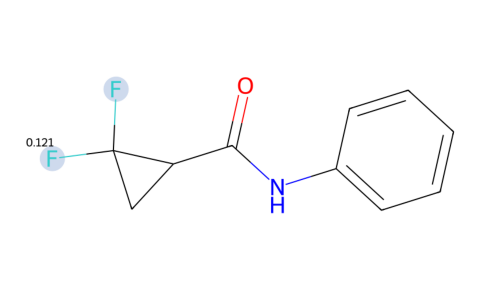

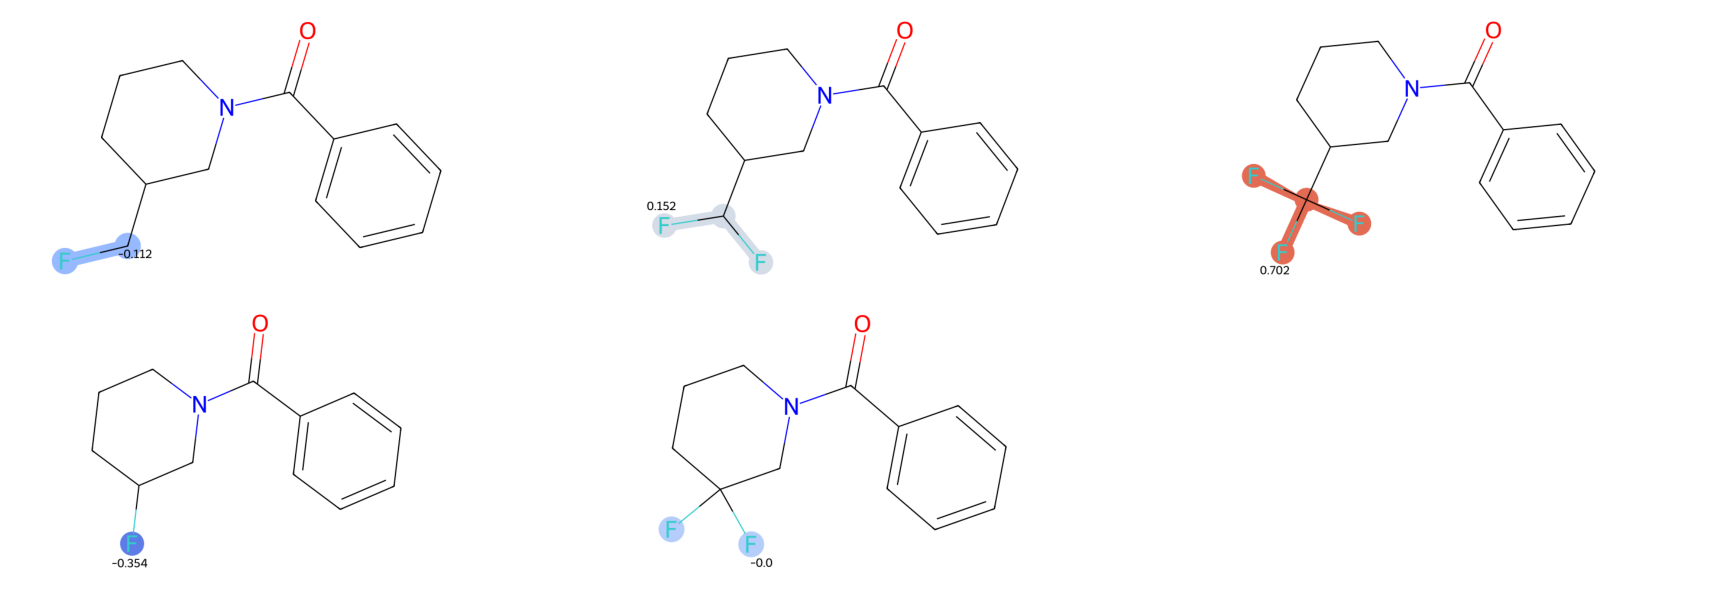

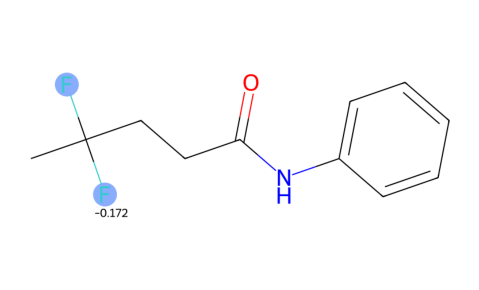

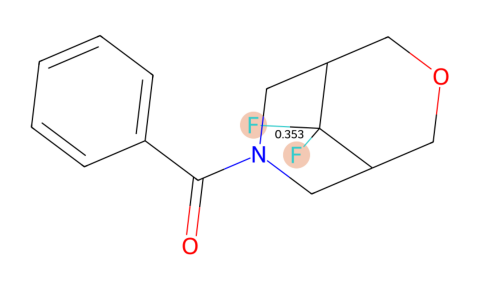

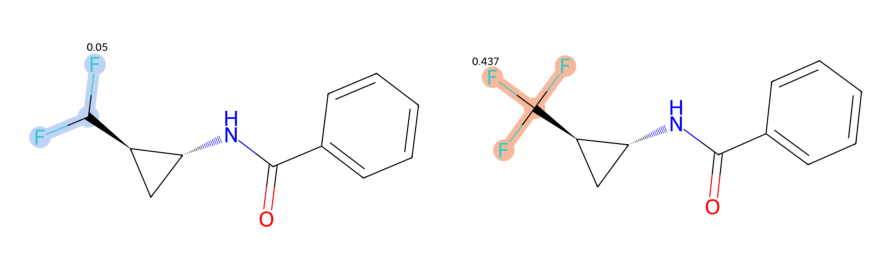

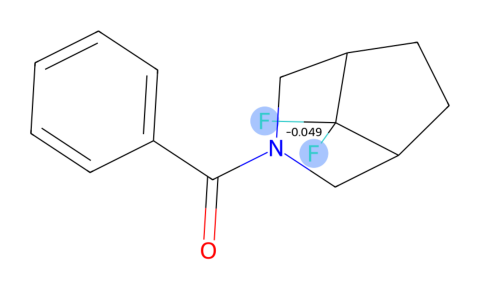

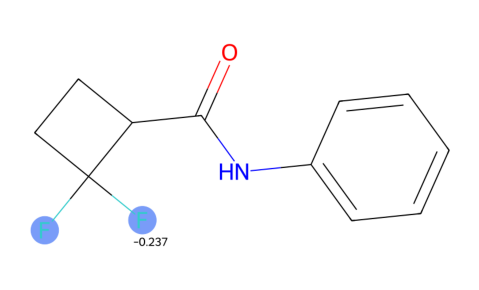

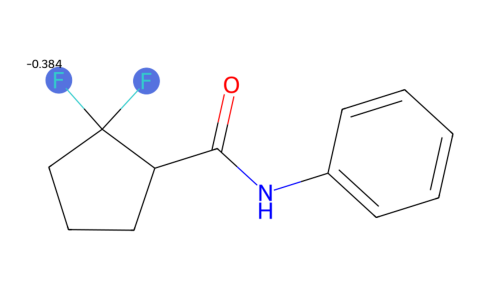

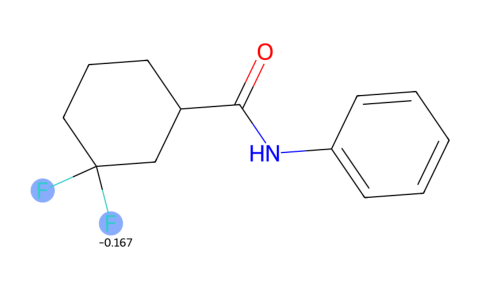

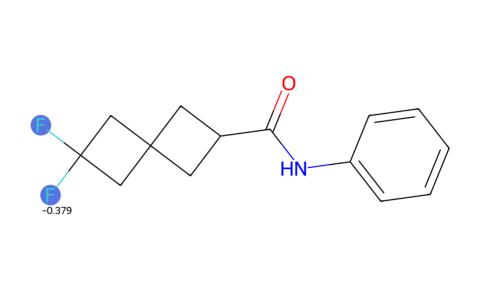

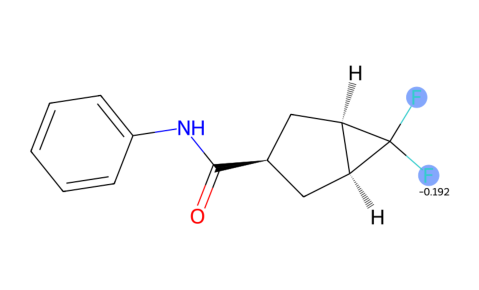

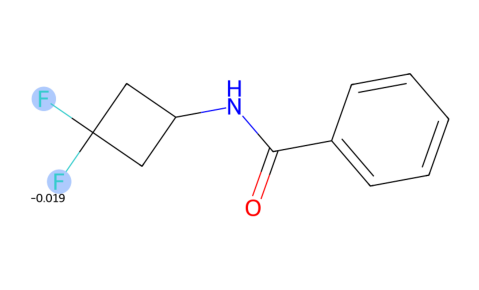

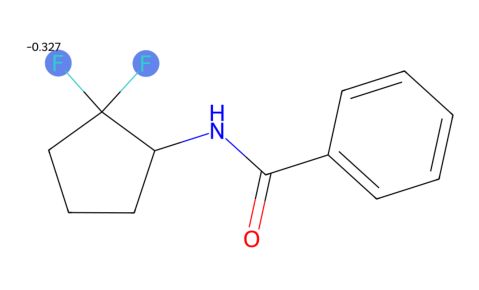

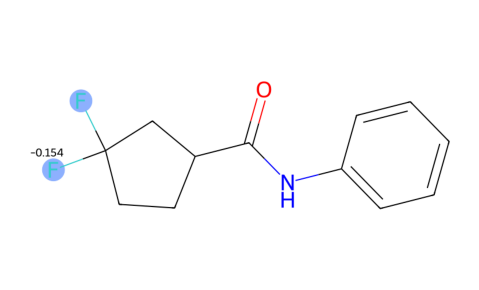

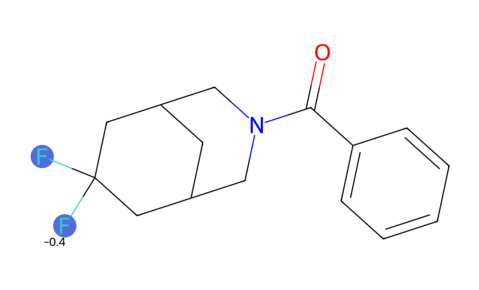

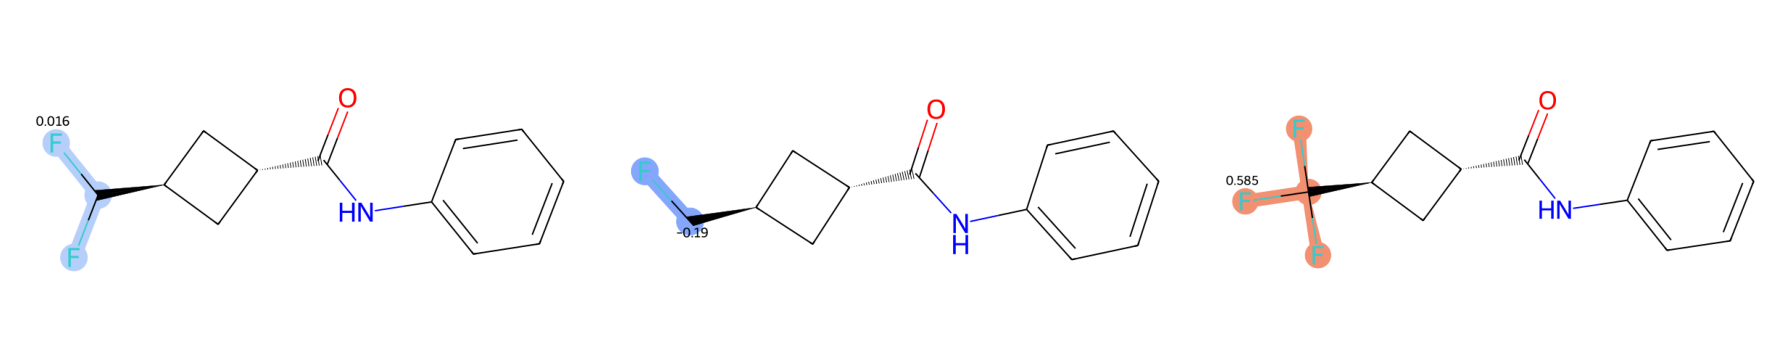

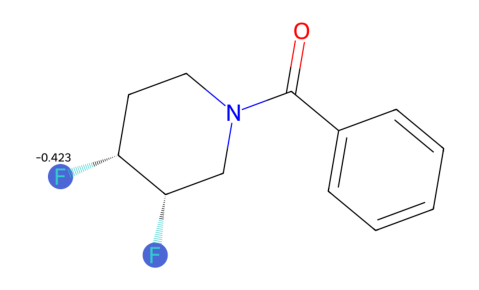

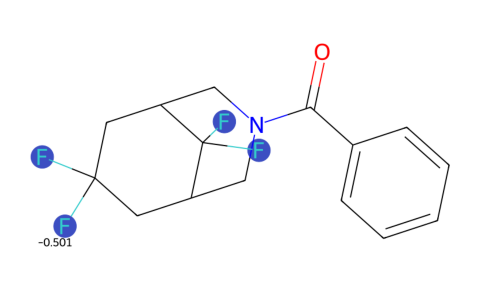

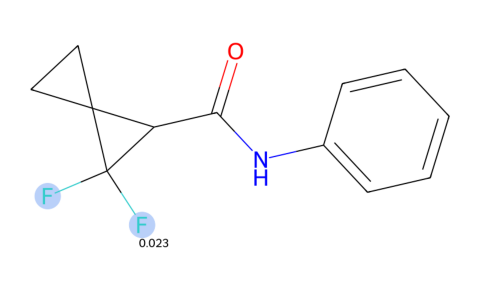

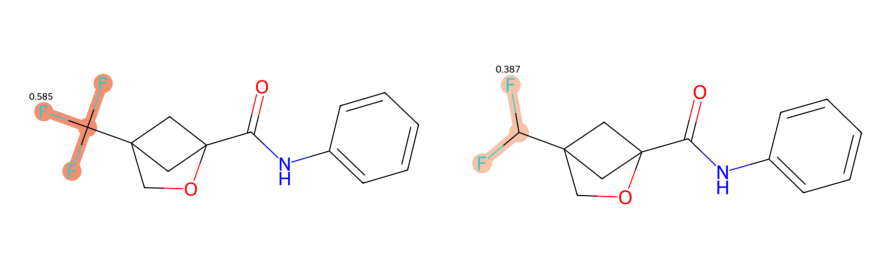

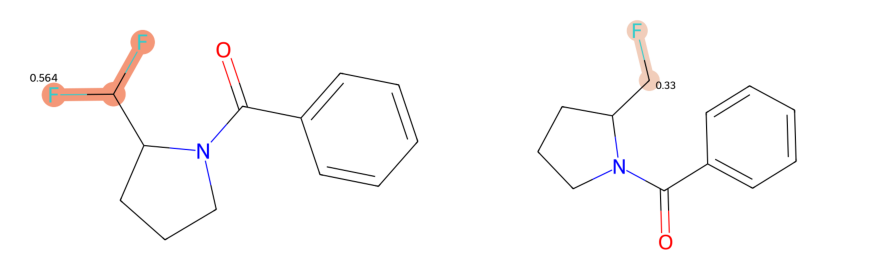

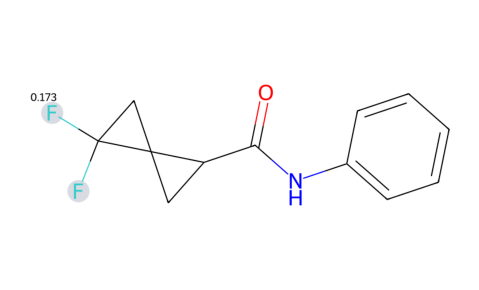

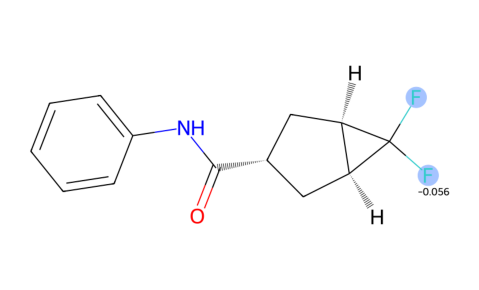

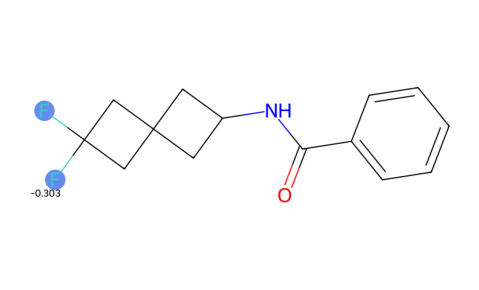

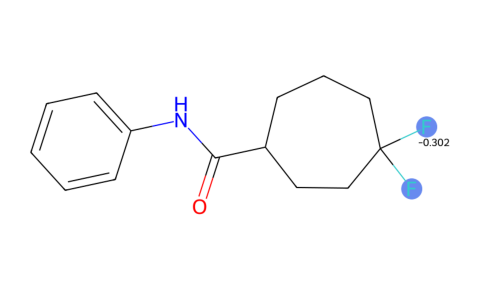

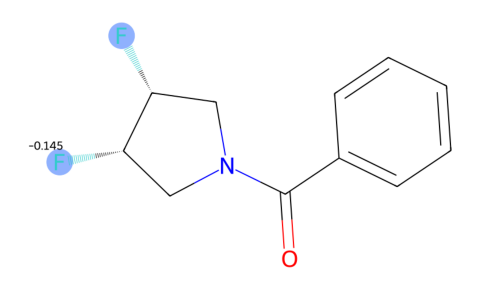

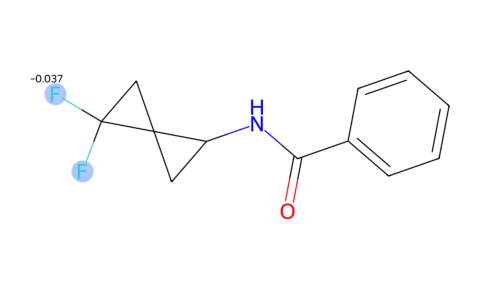

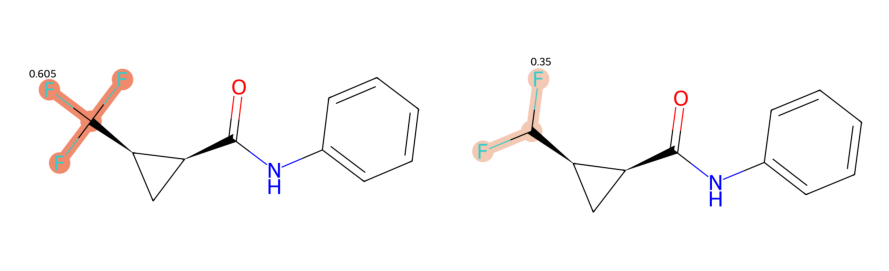

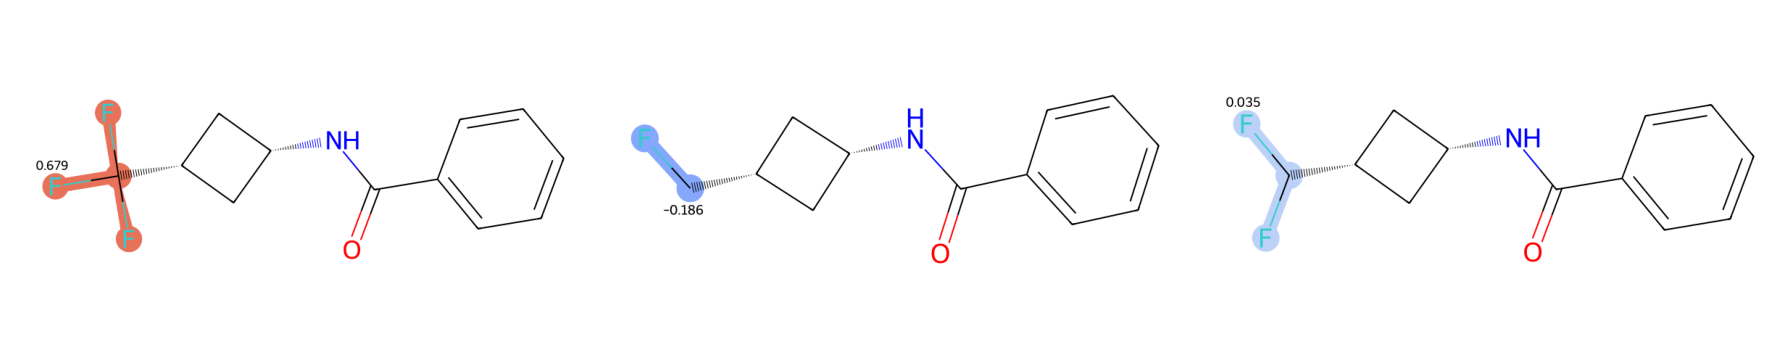

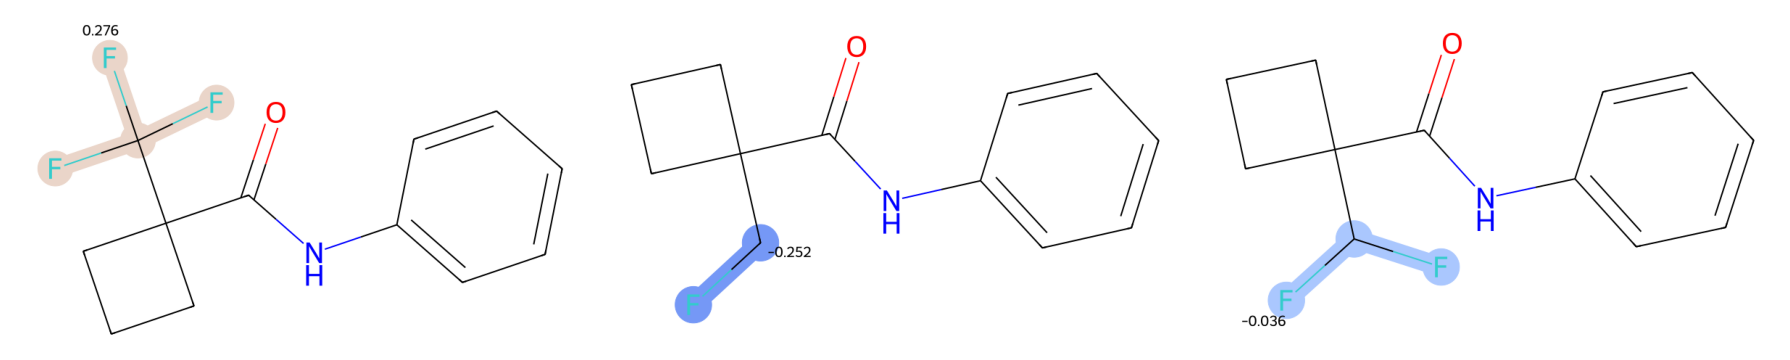

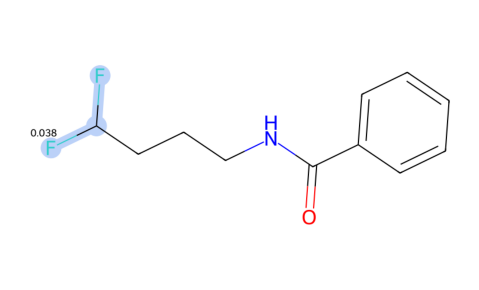

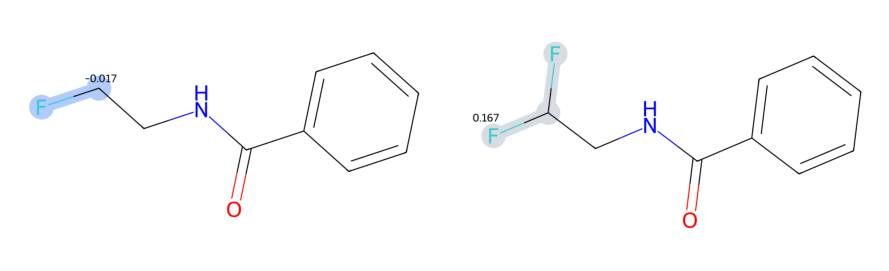

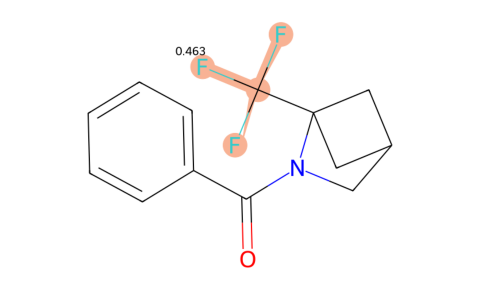

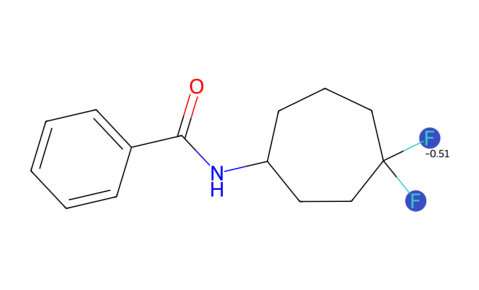

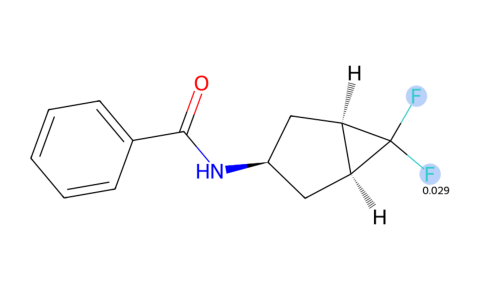

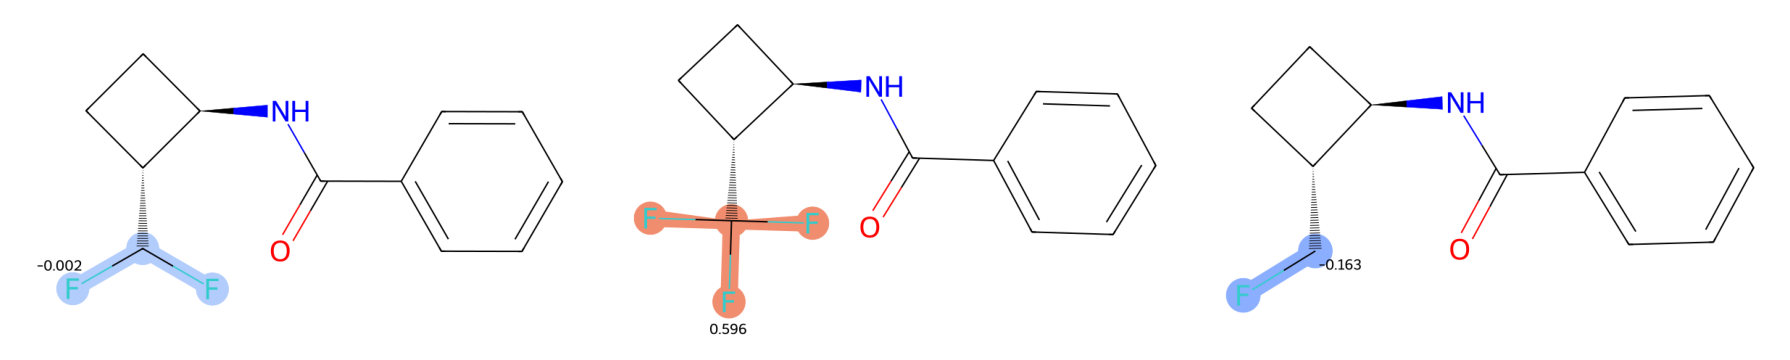

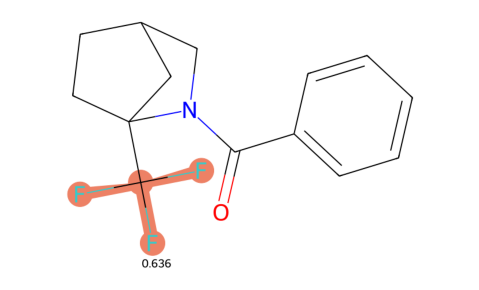

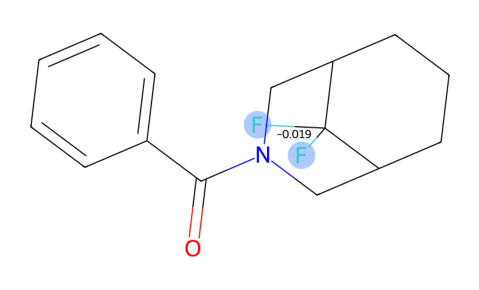

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

save_path = r'C:\work\DrugDiscovery\article\images for article\SME each molecule for supplementary\logP'
for id, smiles_list in id_to_smiles.items():
    amount_of_images = len(smiles_list)
    print(amount_of_images)
    if amount_of_images == 0:
        continue
    
    

    fluorine_groups = "[" + ",".join(map(str,id_to_fluorine_group[id])) + "]}"
    id = id.replace("b}", fluorine_groups)
    
    figure_name = f"logP_{id}.png"
    figure_path = os.path.join(save_path, figure_name)

    if amount_of_images > 1 and amount_of_images < 4:
        if amount_of_images == 2:
            fig, axes = plt.subplots(1, 2, figsize=(9, 3))
        else:
            fig, axes = plt.subplots(1, amount_of_images, figsize=(6*amount_of_images, 6))

        for ax, smi in zip(axes, smiles_list):
            image_path = os.path.join(logp_path, f"LogP_{smi}.png")
            img = mpimg.imread(image_path)
            ax.imshow(img)
            ax.axis('off')
        
        plt.tight_layout()
        plt.savefig(figure_path)

    elif amount_of_images == 4:
        fig, axes = plt.subplots(2, 2, figsize=(12, 6))
        
        for ax, smi in zip(axes.flat, smiles_list):
            image_path = os.path.join(logp_path, f"LogP_{smi}.png")
            img = mpimg.imread(image_path)
            ax.imshow(img)
            ax.axis('off')
    
        plt.tight_layout()
        plt.savefig(figure_path)

    elif amount_of_images == 5:
        fig, axes = plt.subplots(2, 3, figsize=(18, 6))

        index = 0
        
        for ax, smi in zip(axes.flat, smiles_list):
            image_path = os.path.join(logp_path, f"LogP_{smi}.png")
            img = mpimg.imread(image_path)

            if index < 3:
                axes[0, index].imshow(img)
                axes[0, index].axis('off')
            else:
                axes[1, index-3].imshow(img)
                axes[1, index-3].axis('off')
            index += 1
        axes[1, 2].axis('off')
    
        plt.tight_layout()
        plt.savefig(figure_path)
    
    elif amount_of_images == 1:
        print("single image")
        fig, ax = plt.subplots(figsize=(6, 3))
        
        smi = smiles_list.pop()
        image_path = os.path.join(logp_path, f"LogP_{smi}.png")
        img = mpimg.imread(image_path)
        im = ax.imshow(img)
        ax.axis('off')
    
        plt.tight_layout()
        plt.savefig(figure_path)

    # break

--------------

--------------

--------------

--------------

--------------

pka

In [145]:
from rdkit import Chem
import re

def convert_google_sheet_url(url):
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    new_url = re.sub(pattern, replacement, url)

    return new_url

import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/1CzpQGGeGzVZ0sv-pUm6jfaQ2dB6vecDpXeotMhIpUnQ/edit#gid=0'

new_url = convert_google_sheet_url(url)

print(new_url)

df = pd.read_csv(new_url)

df.dropna(subset=['F Group'], inplace=True)

smiles_to_id = {}
for index, row in df.iterrows():
    if pd.isnull(row['F Group Weight']):
        continue
    smiles_to_id[row['Amine/Acid SMILES']] = row['Amine/Acid ID']

https://docs.google.com/spreadsheets/d/1CzpQGGeGzVZ0sv-pUm6jfaQ2dB6vecDpXeotMhIpUnQ/export?gid=0&format=csv


In [146]:
import re

pattern_fluorine_group = r"\{\d+,(\d+)\}"
pattern_scaffold_index = r"\{(\d+),\d+\}"
pattern_molecule_type = r"(\d+)\{"

number_of_molecules = 0

ids = set()

for smiles, id in smiles_to_id.items():
    fluorine_group = int(re.search(pattern_fluorine_group, id).group(1))
    scaffold_index = int(re.search(pattern_scaffold_index, id).group(1))
    molecule_type = int(re.search(pattern_molecule_type, id).group(1))

    if molecule_type not in [1, 2, 3]:
        continue

    transformed_id = id[:-2] + 'b}'
    
    ids.add(transformed_id)

id_to_smiles = {id: set() for id in ids}
id_to_fluorine_group = {id: set() for id in ids}

In [147]:
canon_smiles_to_id = {}
for smiles, id in smiles_to_id.items():
    canon_smiles_to_id[Chem.CanonSmiles(smiles)] = id

In [148]:
import os
import sys

pka_mol_images = os.listdir(pka_path)
pka_smiles = [filename.split('_')[1].split('.')[0] for filename in pka_mol_images]

not_found = 0
for smiles in pka_smiles:
    
    
    canon_smiles = Chem.CanonSmiles(smiles)
    if canon_smiles not in canon_smiles_to_id:
        not_found += 1
        continue
    
    id = canon_smiles_to_id[smiles]
    fluorine_group = int(re.search(pattern_fluorine_group, id).group(1))
    transformed_id = id[:-2] + 'b}'
    id_to_smiles[transformed_id].add(smiles)
    id_to_fluorine_group[transformed_id].add(fluorine_group)

print(not_found)

0


3
3
2
1
single image
1
single image
1
single image
1
single image
1
single image
2
1
single image
1
single image
3
1
single image
3
3
1
single image
1
single image
3
3
1
single image
1
single image


C:\Users\38066\AppData\Local\Temp\ipykernel_14388\4251309898.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 3))


1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
2
3
1
single image
1
single image
1
single image
2
5
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
2
1
single image
3
1
single image
3
4
1
single image
1
single image
1
single image
5
3
1
single image
5
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
2
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
1
single image
3
3


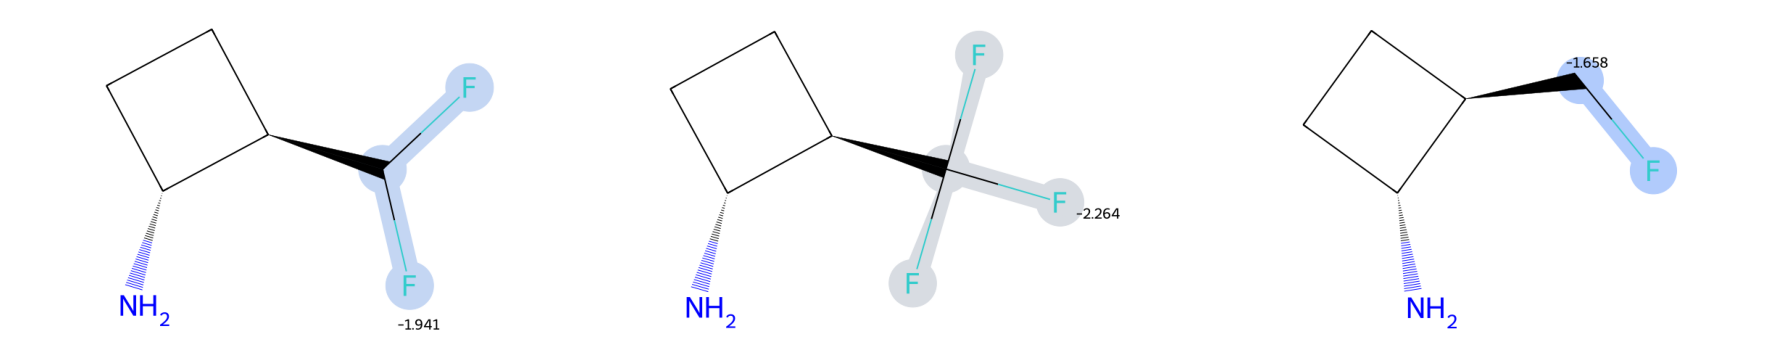

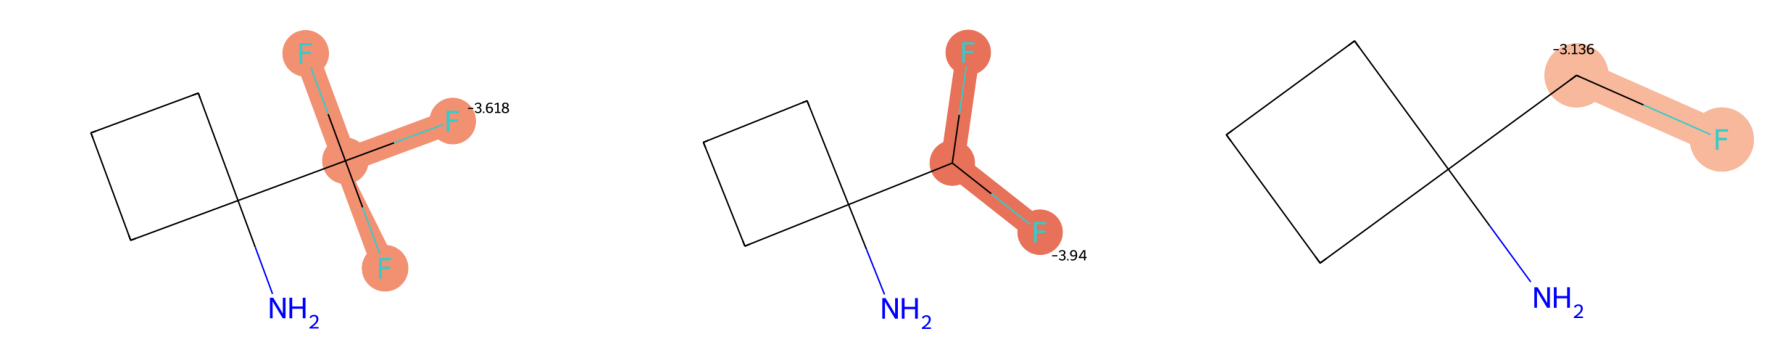

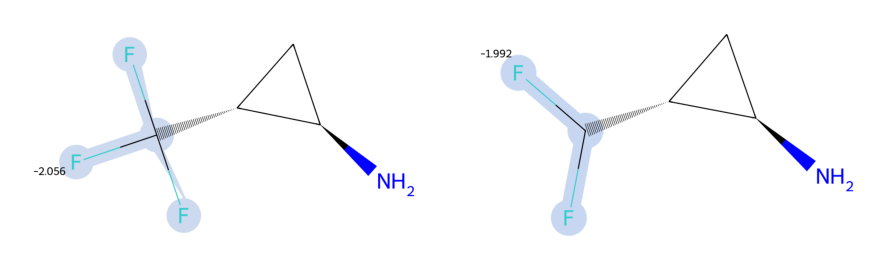

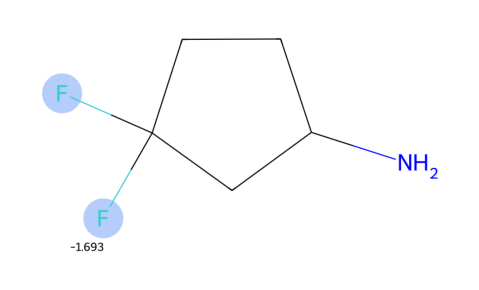

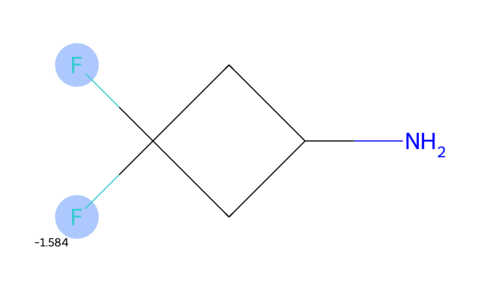

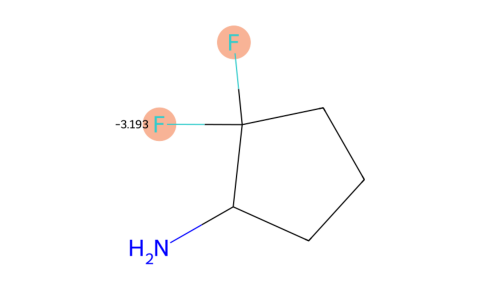

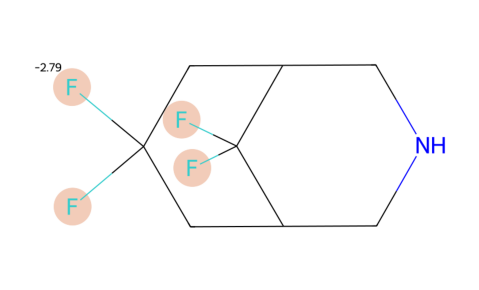

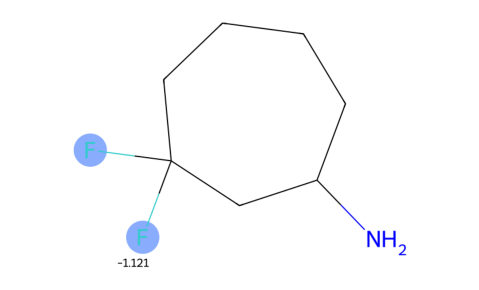

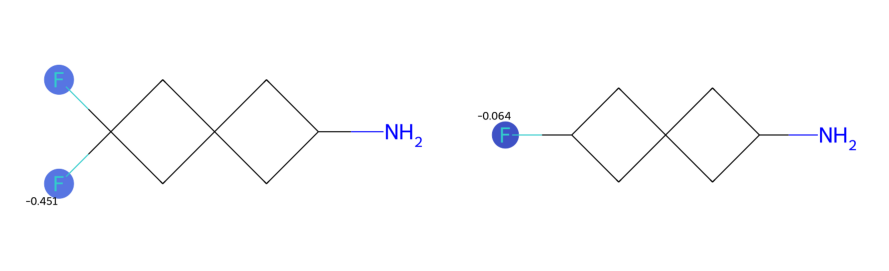

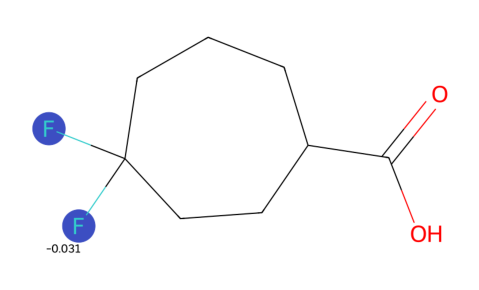

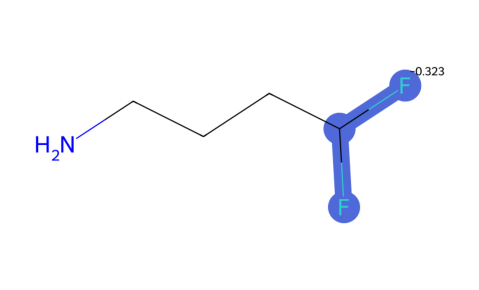

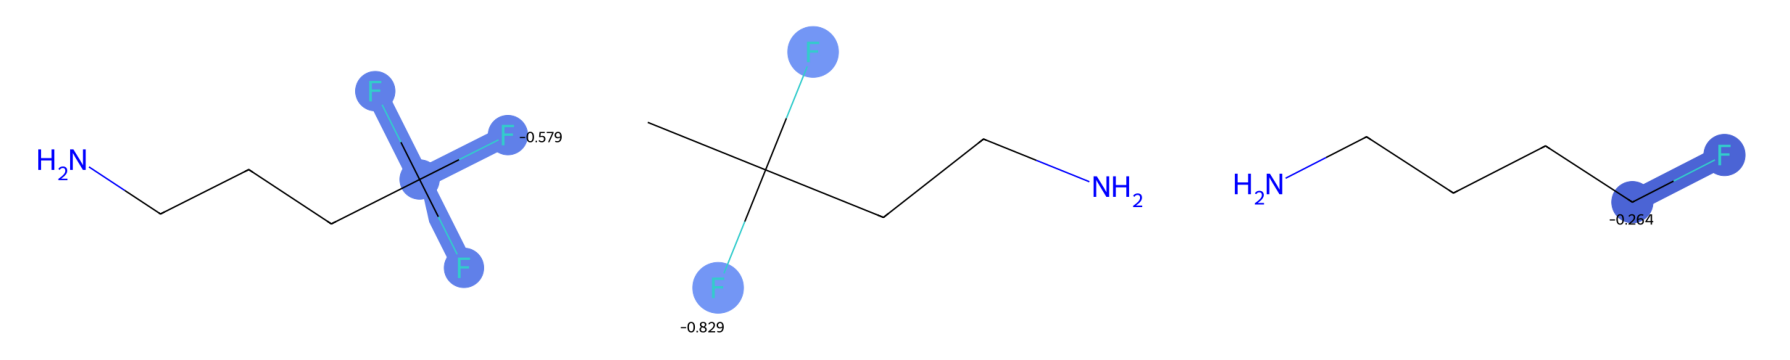

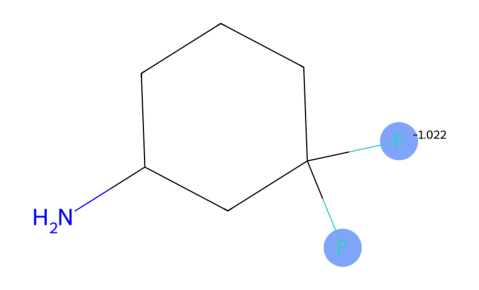

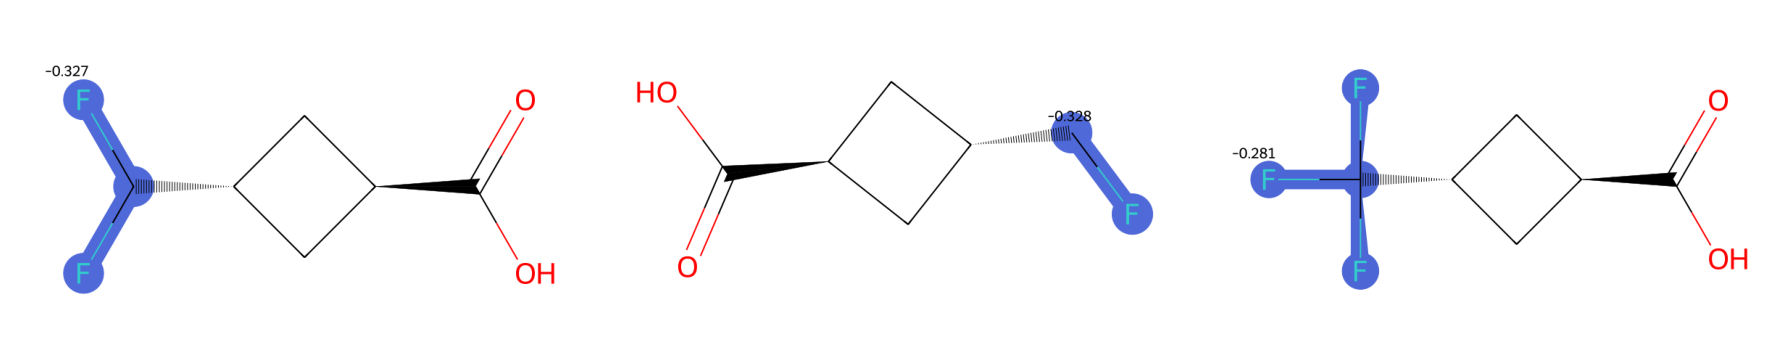

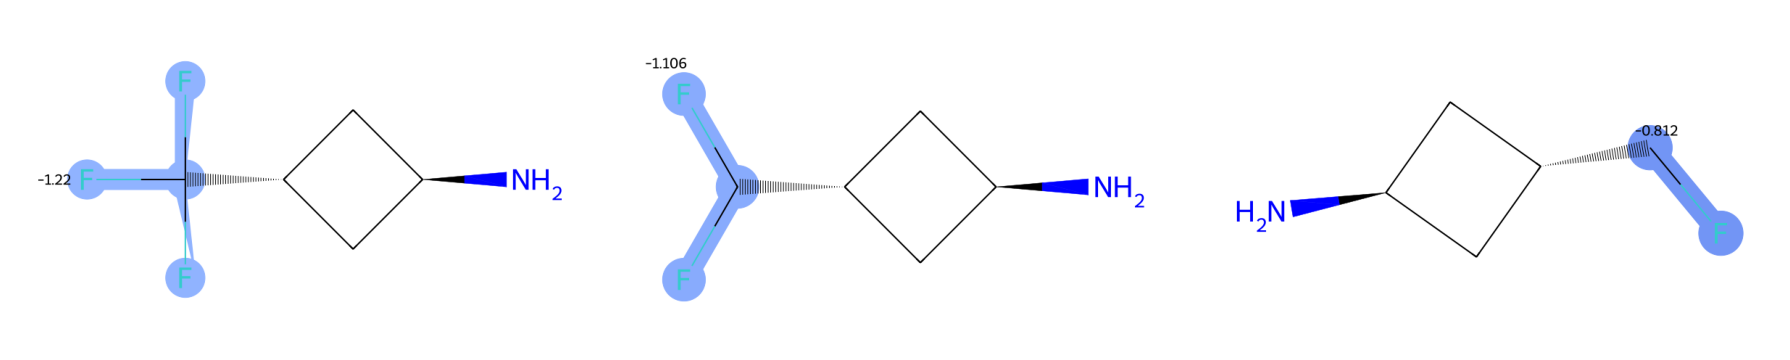

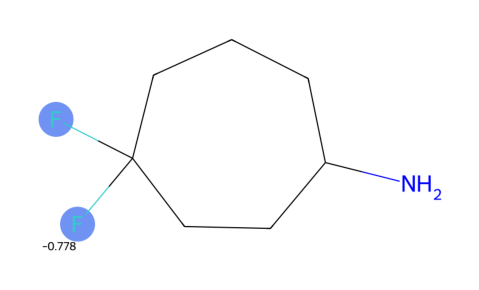

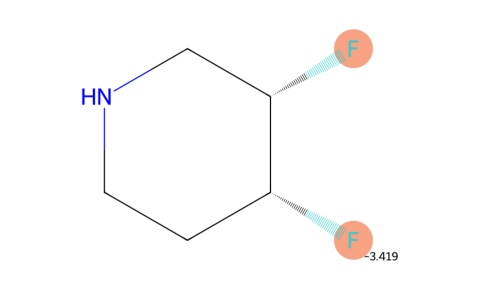

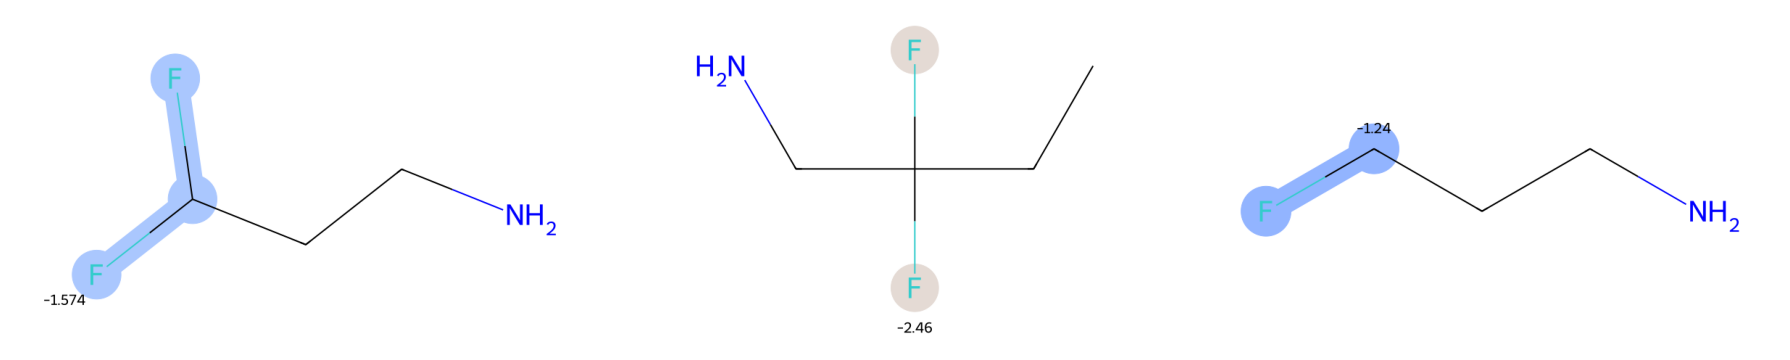

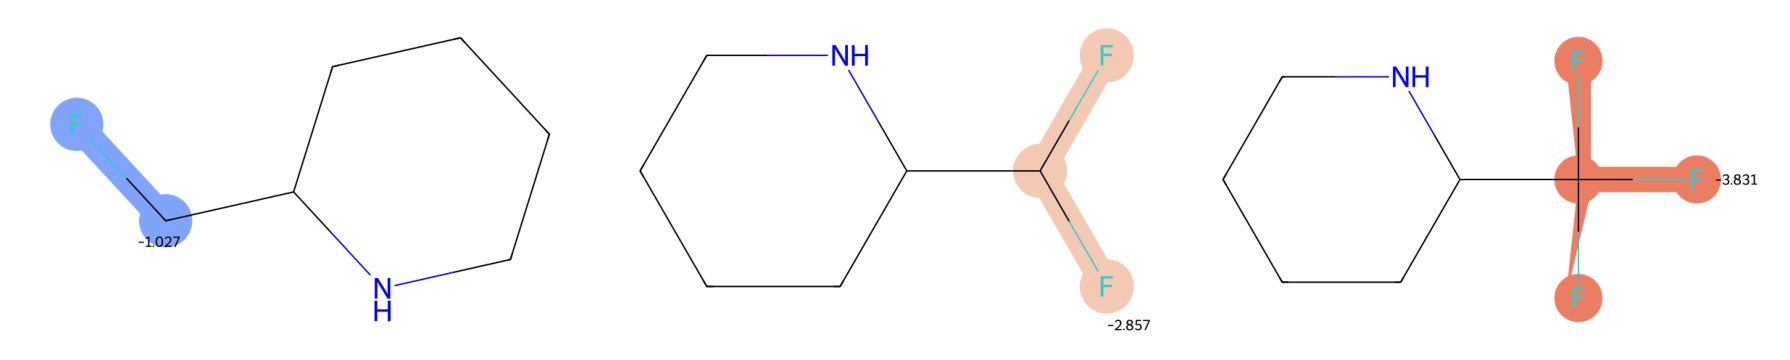

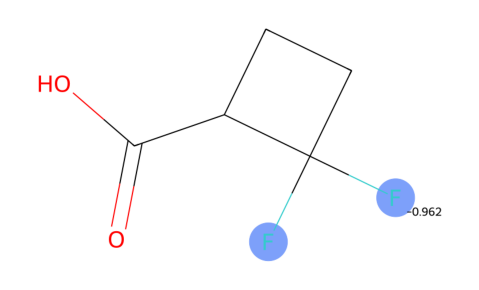

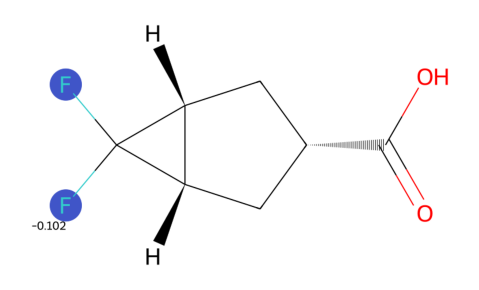

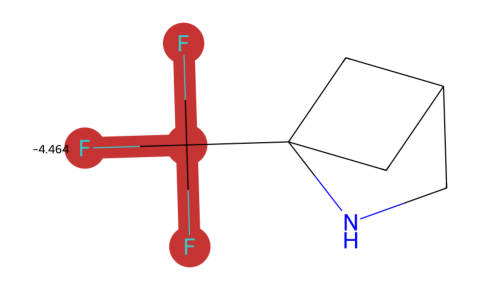

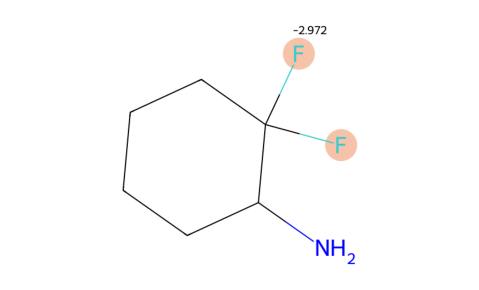

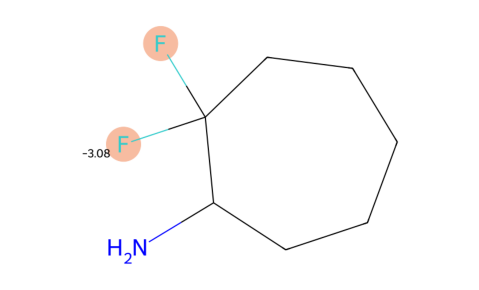

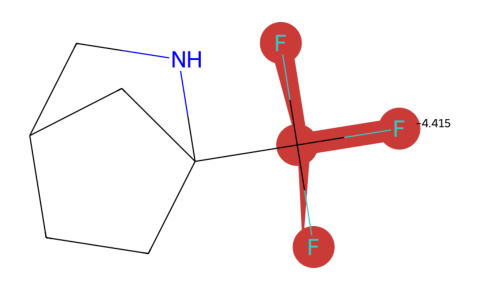

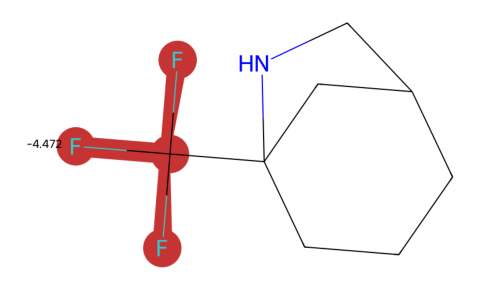

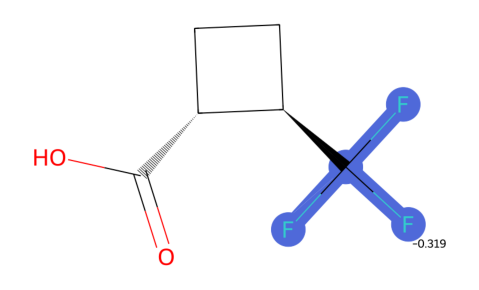

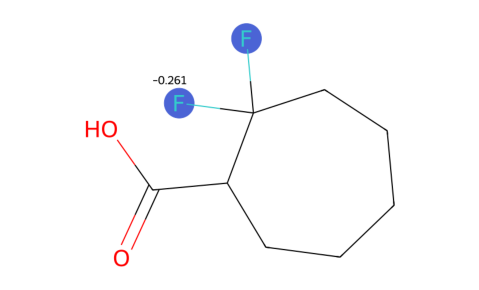

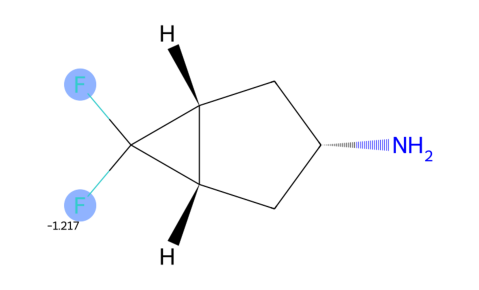

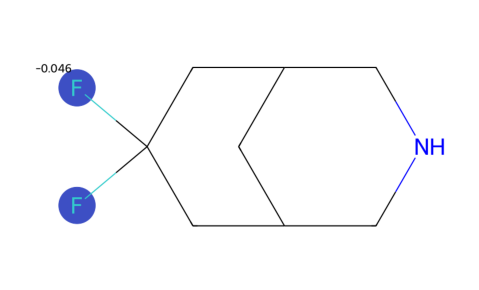

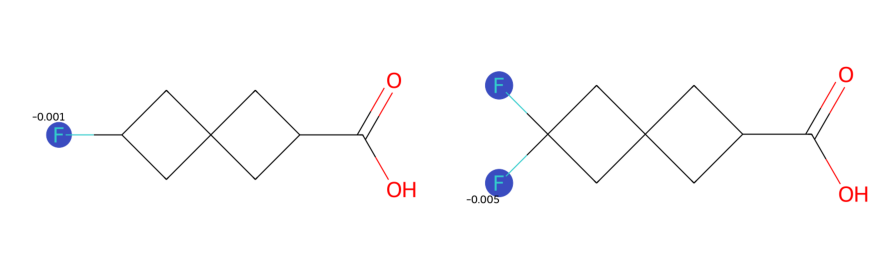

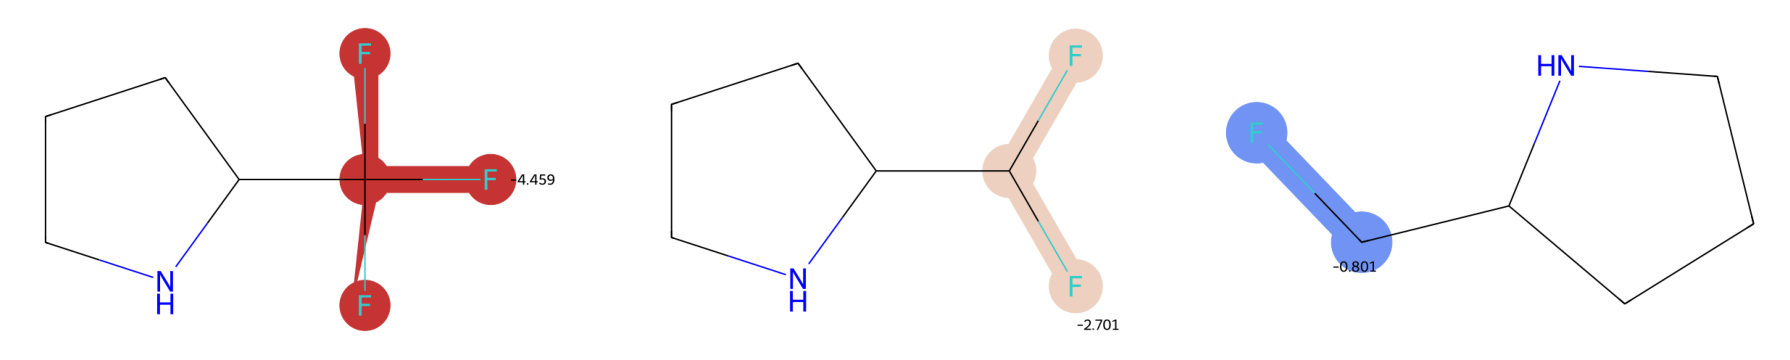

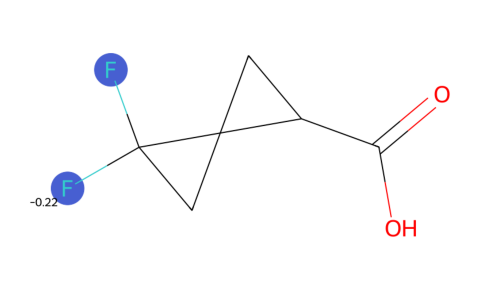

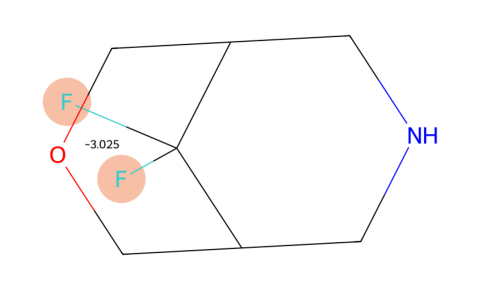

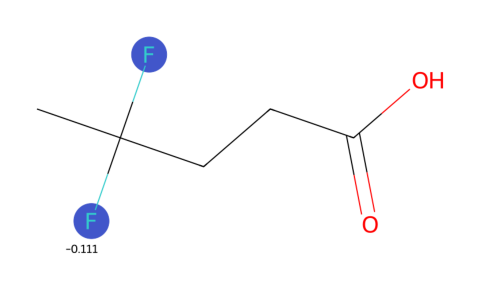

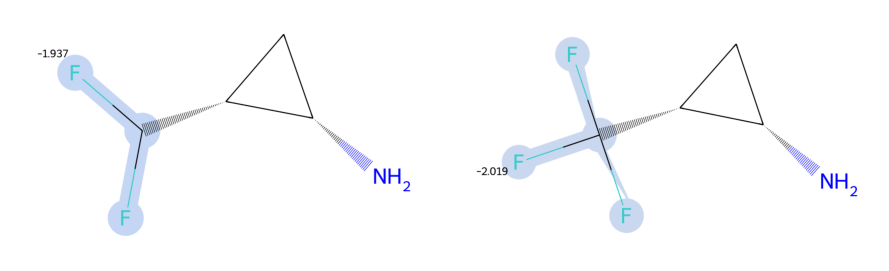

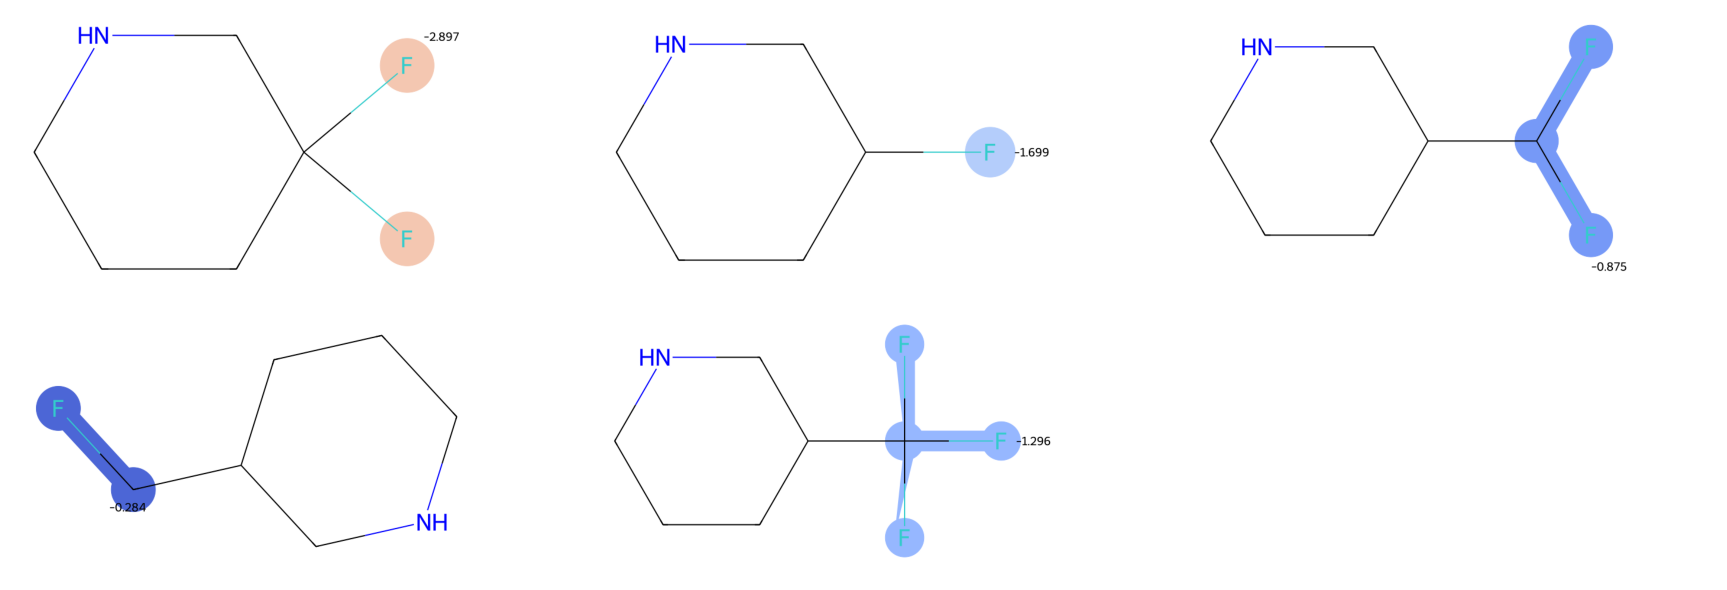

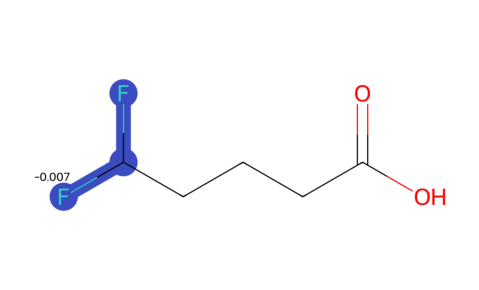

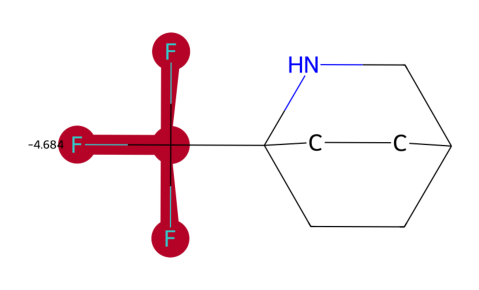

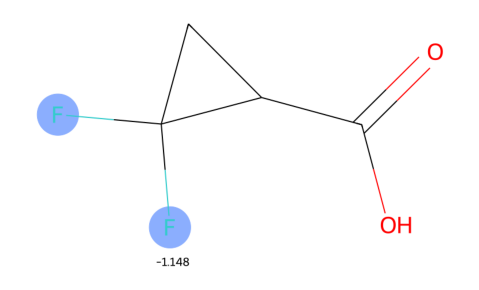

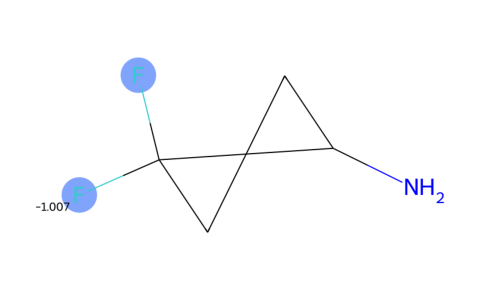

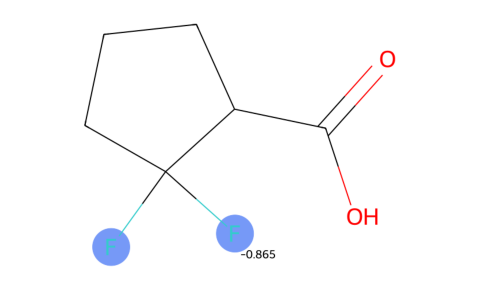

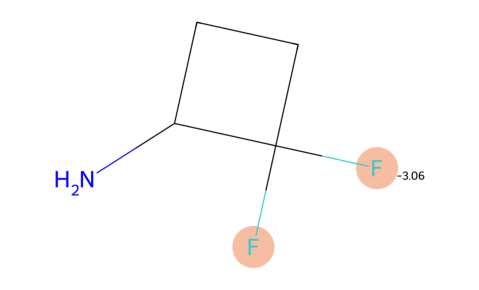

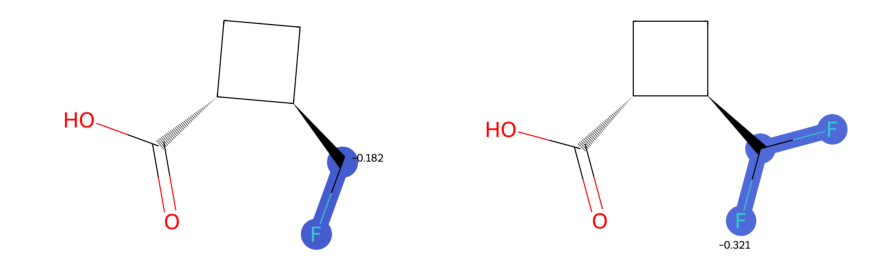

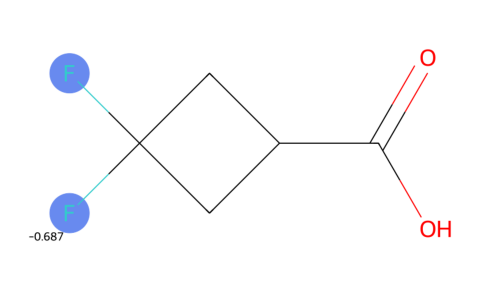

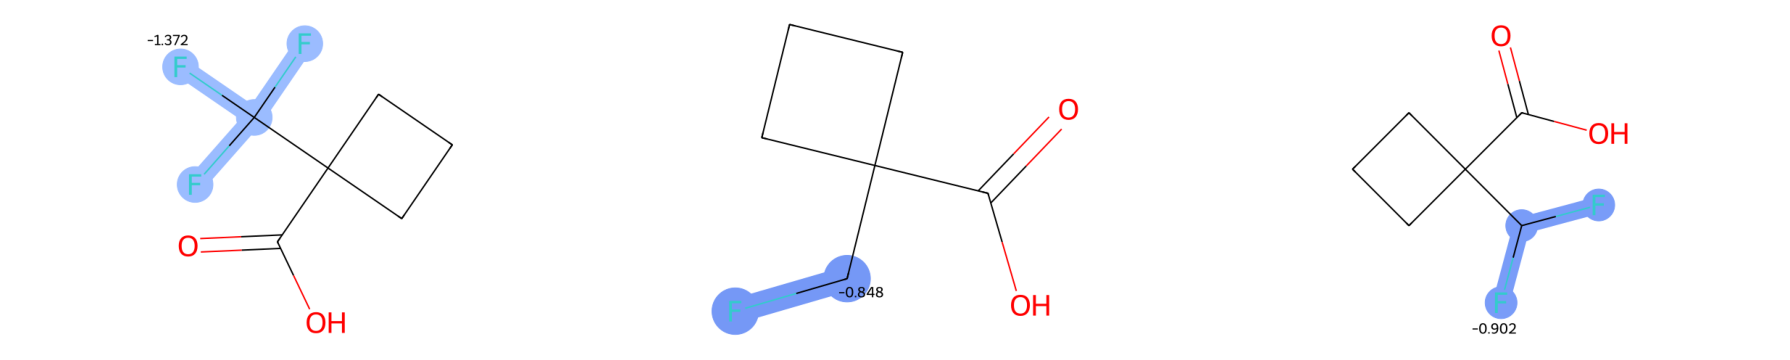

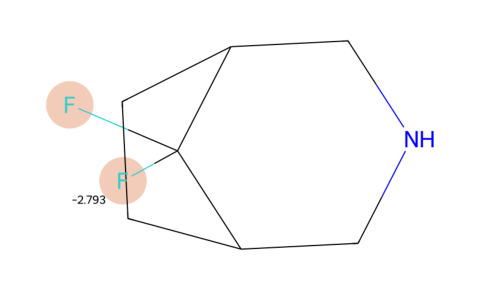

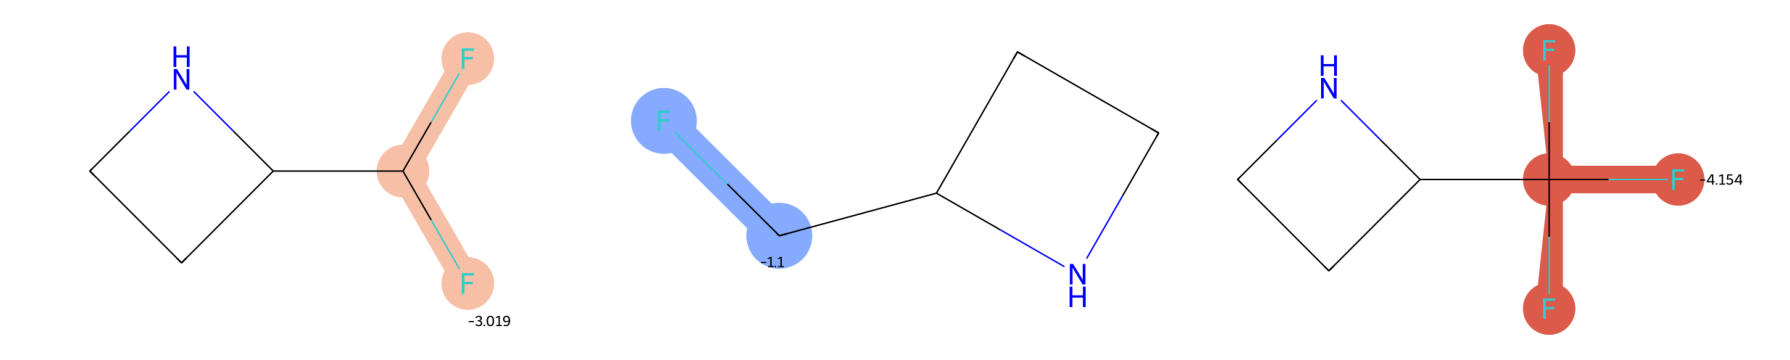

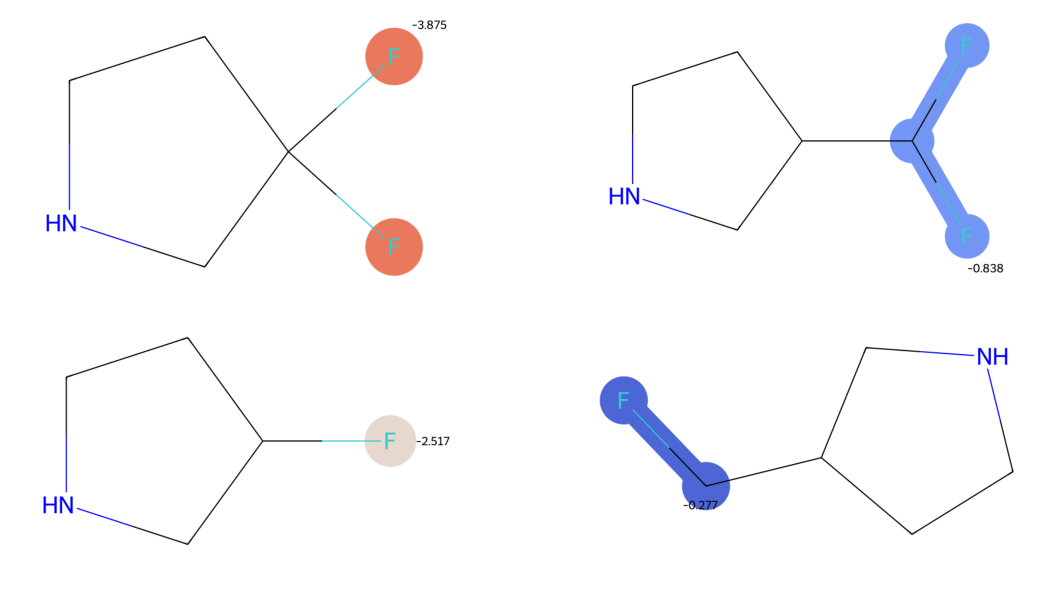

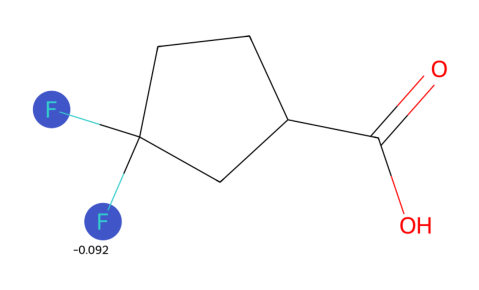

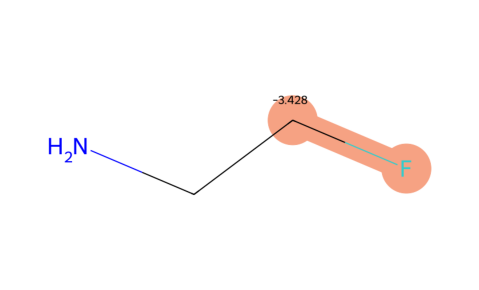

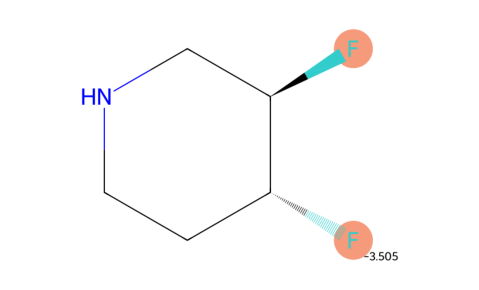

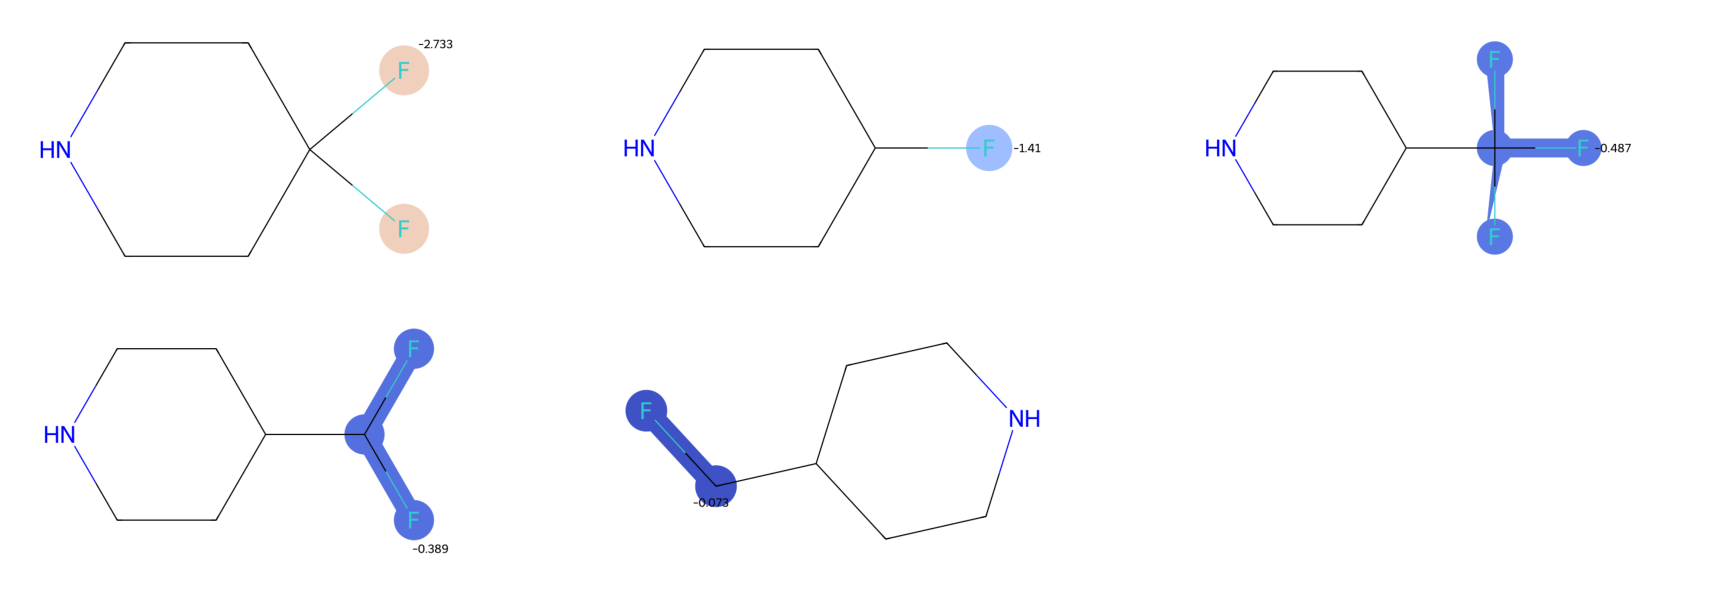

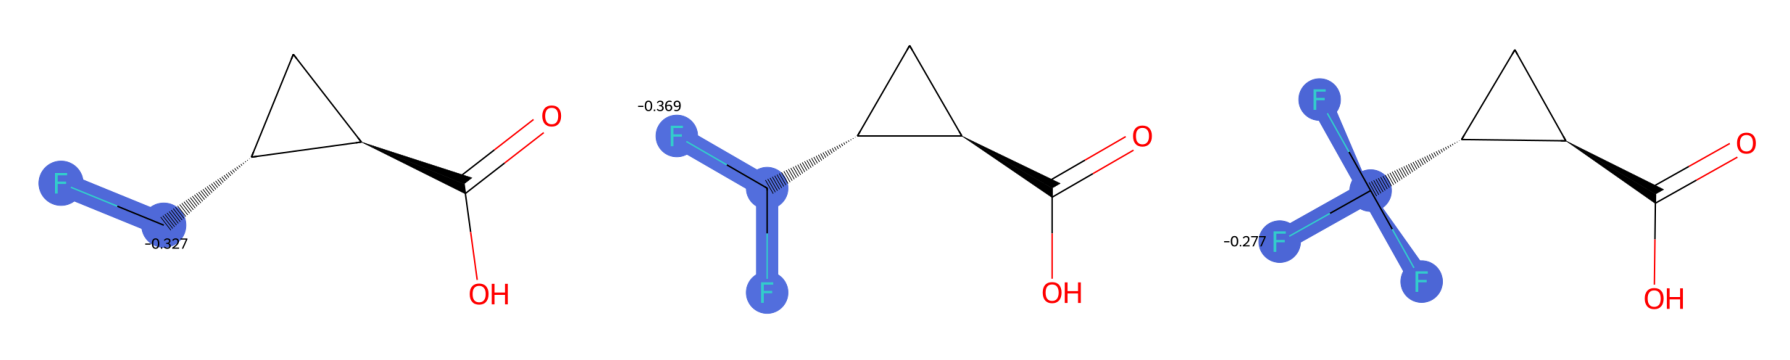

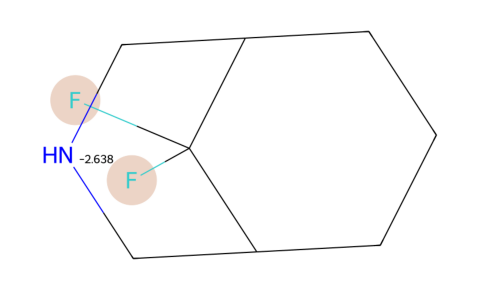

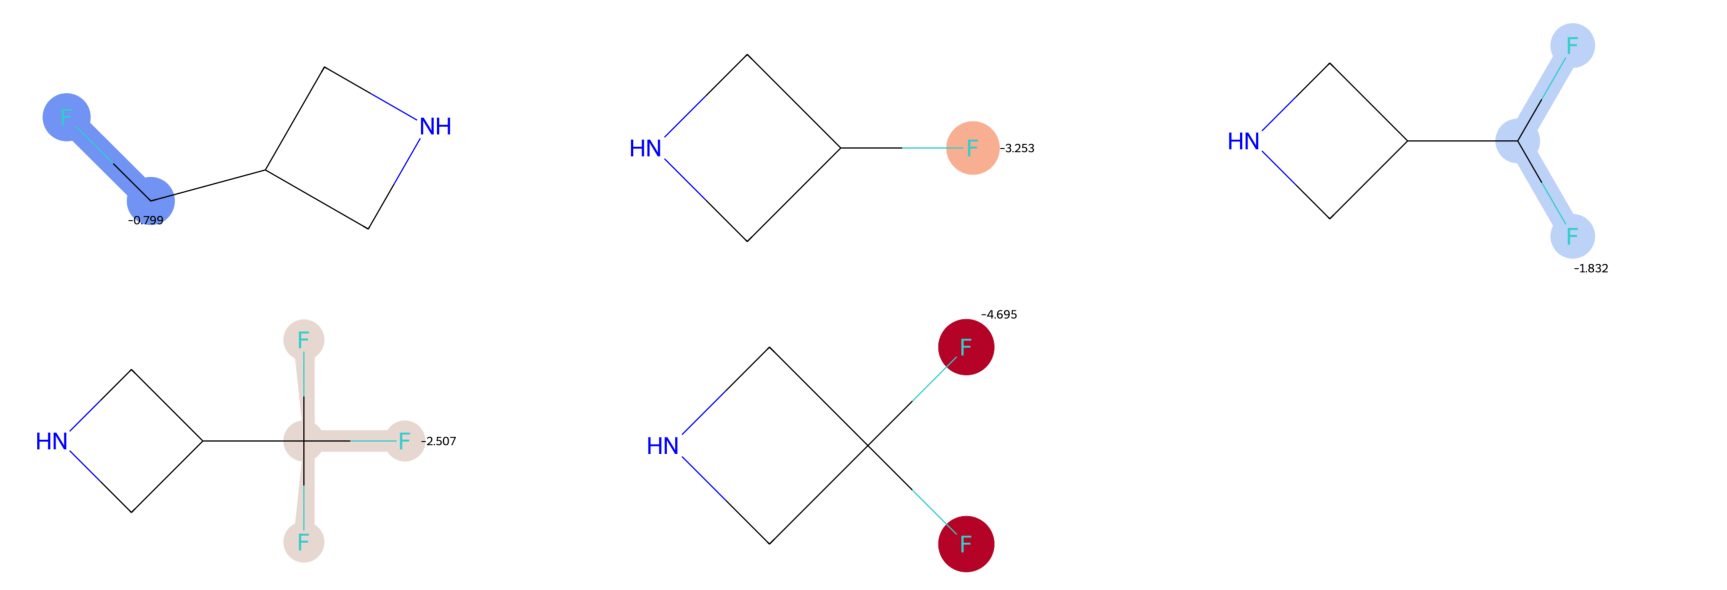

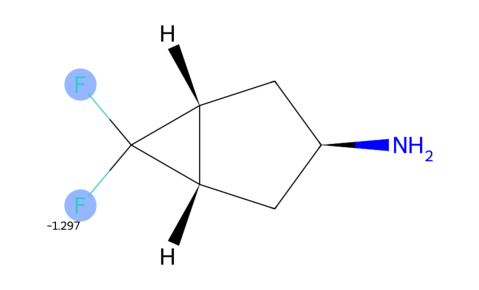

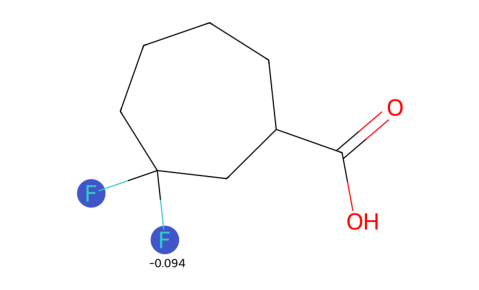

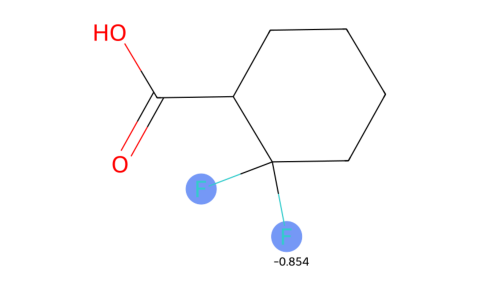

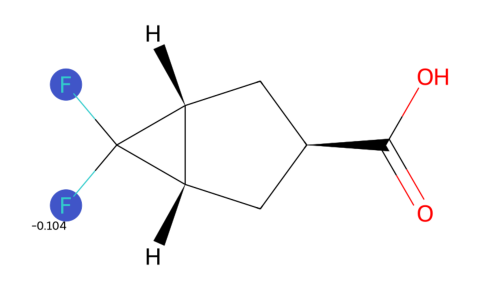

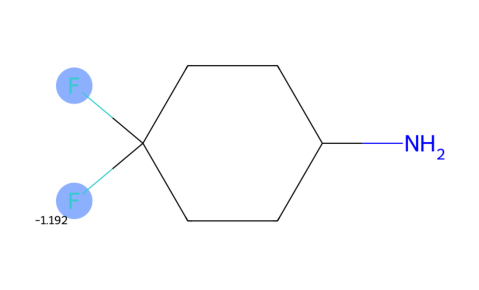

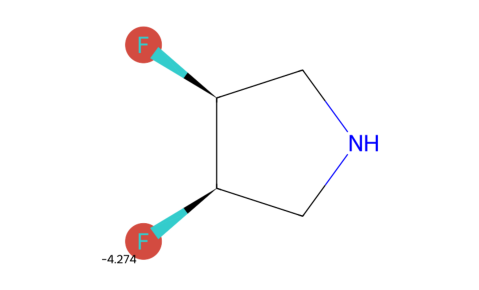

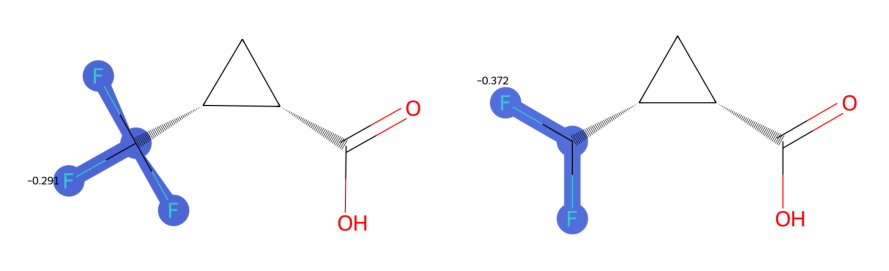

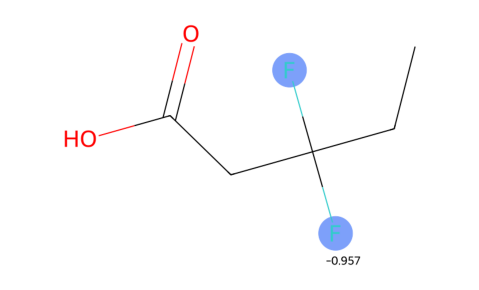

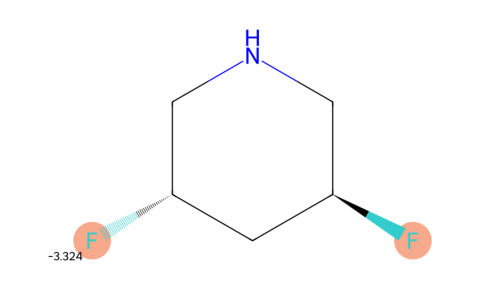

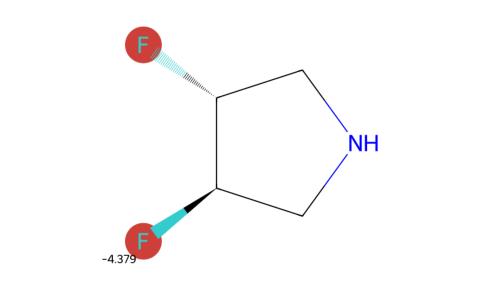

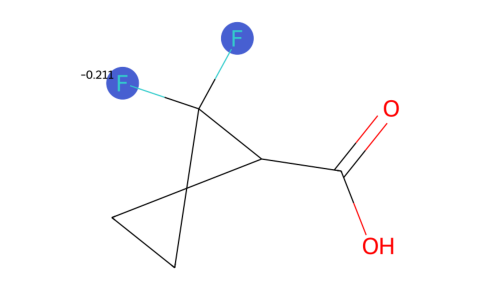

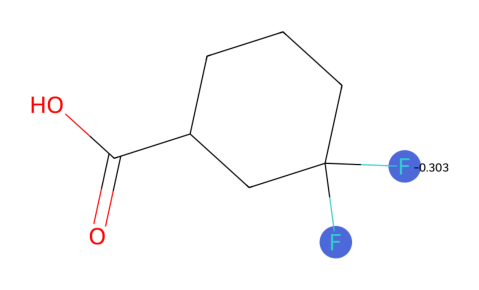

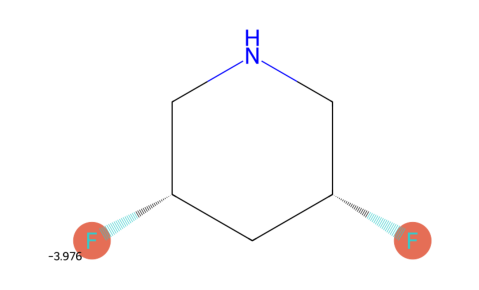

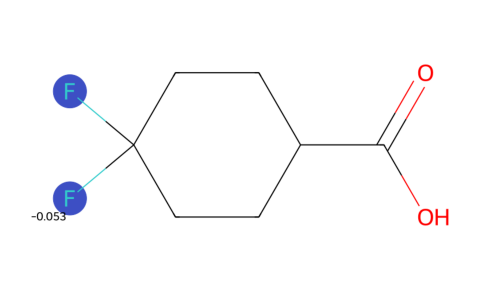

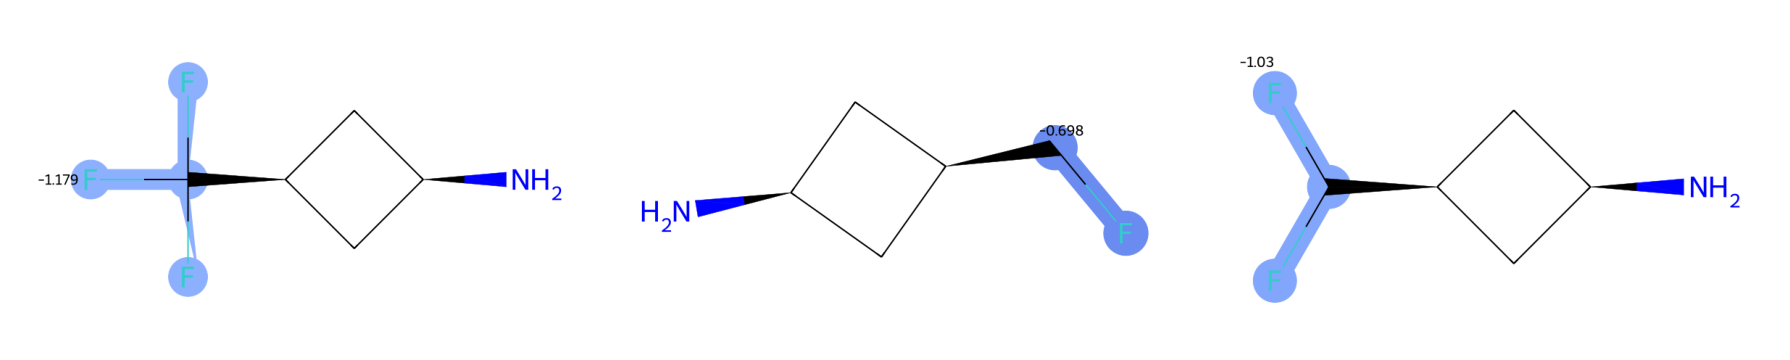

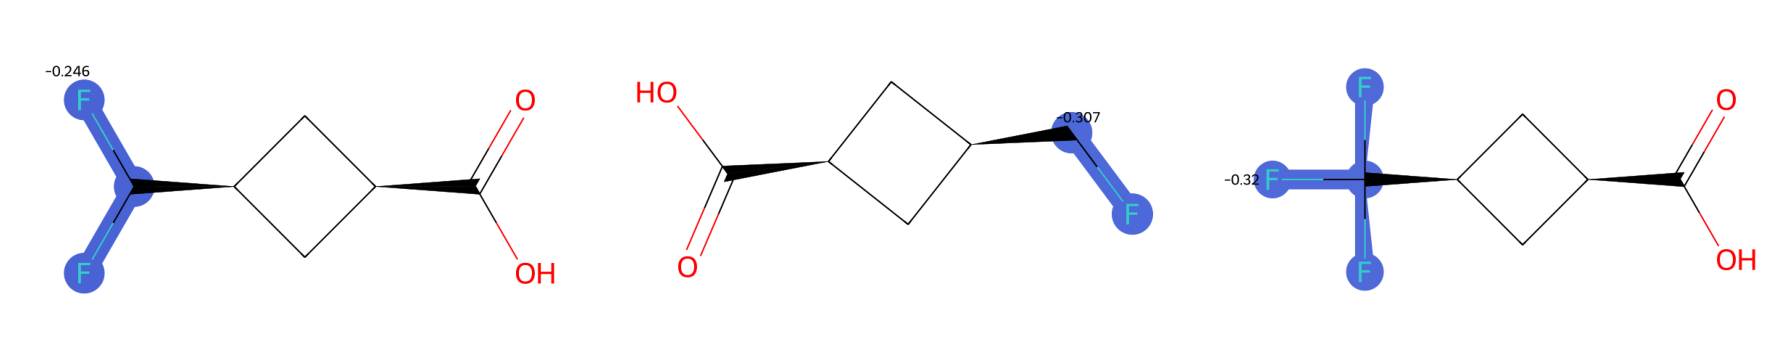

In [149]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

save_path = r'C:\work\DrugDiscovery\article\images for article\SME each molecule for supplementary\pKa'
for id, smiles_list in id_to_smiles.items():
    amount_of_images = len(smiles_list)
    print(amount_of_images)
    if amount_of_images == 0:
        continue

    fluorine_groups = "[" + ",".join(map(str,id_to_fluorine_group[id])) + "]}"
    id = id.replace("b}", fluorine_groups)
    
    figure_name = f"pKa_{id}.png"
    figure_path = os.path.join(save_path, figure_name)

    if amount_of_images > 1 and amount_of_images < 4:
        if amount_of_images == 2:
            fig, axes = plt.subplots(1, 2, figsize=(9, 3))
        else:
            fig, axes = plt.subplots(1, amount_of_images, figsize=(6*amount_of_images, 6))

        for ax, smi in zip(axes, smiles_list):
            image_path = os.path.join(pka_path, f"pKa_{smi}.png")
            img = mpimg.imread(image_path)
            ax.imshow(img)
            ax.axis('off')
        
        plt.tight_layout()
        plt.savefig(figure_path)

    elif amount_of_images == 4:
        fig, axes = plt.subplots(2, 2, figsize=(12, 6))
        
        for ax, smi in zip(axes.flat, smiles_list):
            image_path = os.path.join(pka_path, f"pKa_{smi}.png")
            img = mpimg.imread(image_path)
            ax.imshow(img)
            ax.axis('off')
    
        plt.tight_layout()
        plt.savefig(figure_path)

    elif amount_of_images == 5:
        fig, axes = plt.subplots(2, 3, figsize=(18, 6))

        index = 0
        
        for ax, smi in zip(axes.flat, smiles_list):
            image_path = os.path.join(pka_path, f"pKa_{smi}.png")
            img = mpimg.imread(image_path)

            if index < 3:
                axes[0, index].imshow(img)
                axes[0, index].axis('off')
            else:
                axes[1, index-3].imshow(img)
                axes[1, index-3].axis('off')
            index += 1
        axes[1, 2].axis('off')
    
        plt.tight_layout()
        plt.savefig(figure_path)
    
    elif amount_of_images == 1:
        print("single image")
        fig, ax = plt.subplots(figsize=(6, 3))
        
        smi = smiles_list.pop()
        image_path = os.path.join(pka_path, f"pKa_{smi}.png")
        img = mpimg.imread(image_path)
        im = ax.imshow(img)
        ax.axis('off')
    
        plt.tight_layout()
        plt.savefig(figure_path)

    # break